<a href="https://colab.research.google.com/github/AlMarNeuro/AlMarNR/blob/media108/Stajirovka_Media108_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Настройка хранилища, библиотек и глобальных переменных

- Инициализация

In [ ]:
# Подключение google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Загрузка библиотек

In [ ]:
#
# Загрузка библиотек
#
import os # Работа с файловой системой

import time # Работа с системным временем

import pickle as pkl # Сериализация данных

import pandas as pd # Датафреймы
# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_colwidth = 999

import numpy as np

import regex as re

import librosa # Для параметризации аудио
import librosa.display # Для отображения аудио сигналов

import matplotlib.pyplot as plt # Для отрисовки графиков
plt.style.use('dark_background')

from google.colab import files # Для загрузки файлов
#import IPython.display as ipd # Для проигрывания аудио
#from IPython.display import Audio
#import seaborn as sns

###
# Подготовка данных
#import sklearn # Для нормирования
#from sklearn.preprocessing import LabelEncoder, StandardScaler # Масштабирование, нормировка данных
#from sklearn.model_selection import train_test_split # Разбиение на обучающую и проверочную выборку

from sklearn.utils import shuffle # Синхронно перемешать 2 набора данных (XTrain и YTrain)
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow import keras

# Функции-утилиты для работы с категориальными данными
# from keras.api._v2.keras import utils
# from keras.api._v2.keras.utils import to_categorical

# Рисование схемы модели
from keras.api._v2.keras.utils import plot_model

# Класс для конструирования последовательной модели нейронной сети
from keras.api._v2.keras.models import Sequential, Model
# Загрузка сохранённой модели
from keras.api._v2.keras.models import load_model

# Для создания слоя настраиваемой функции активации
# from keras.api._v2.keras import backend as K
# from keras.api._v2.keras.utils import register_keras_serializable
# from keras.api._v2.keras.utils import custom_object_scope

# Основные слои
from keras.api._v2.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from keras.api._v2.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, Conv2D, MaxPooling1D, GlobalMaxPooling1D, AveragePooling1D, Layer

# Оптимизаторы
from keras.api._v2.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
#from keras.api._v2.keras.preprocessing.text import Tokenizer

%matplotlib inline

- Переменные глобальные

In [ ]:
#
# Глобальные переменные
#

#ACCOUNT = 'mar'
ACCOUNT = 'adi'

if ACCOUNT == 'mar':
  VM_CNT = '/content'
  VM_CNT_DRV = VM_CNT + '/drive'
  MY_CNT = '/content/drive/MyDrive/УИИ(marphida)/Стажировка_Media108'

  WAV_PATH = VM_CNT_DRV + '/MyDrive/УИИ(marphida)/Стажировка_Media108/Audio/'
  WAV_FILE = '2023-07-16_19-33-07.854622_from_79254254955_to_0111642_session_3091299879_talk.wav'
  WAV_DATA = WAV_PATH + WAV_FILE

  WAV_PRIMA = MY_CNT + '/Audio/Записи звонков_primavera/'
  WAV_PAVEL = MY_CNT + '/Audio/Записи звонков_павелецкая сити'
  WAV_HEADL = MY_CNT + '/Audio/Записи звонков_хедлайнер'
  WAV_ZV_INFO = MY_CNT + '/Audio/Информация о звонках'

  DF_HL = MY_CNT + '/РГ/Headliner_df.pkl'
  DF_PAVEL_ST = MY_CNT + '/РГ/Paveletskaya_city_df.pkl'
  DF_PAVEL_HL = MY_CNT + '/РГ/Paveletskaya_df.pkl'
  DF_PRIMA = MY_CNT + '/РГ/Primavera_df.pkl'
  DF_TOTAL = MY_CNT + '/РГ/total_df.pkl'
  DF_TOTAL_MATCH = MY_CNT + '/РГ/total_match_df.pkl'
  DF_TOTAL_NOT_MATCH = MY_CNT + '/РГ/total_not_match_df.pkl'

  CSV_HL = MY_CNT + '/РП/Headliner_with_audio.csv'
  CSV_PST = MY_CNT + '/РП/Павелецкая_ЖК_«Павелецкая_сити»_with_audio.csv'
  CSV_PTB = MY_CNT + '/РП/Paveleckaya_with_audio.csv'
  CSV_PRM = MY_CNT + '/РП/Primavera_with_audio.csv'

  DUMP = '/content/drive/MyDrive/УИИ(marphida)/Стажировка_Media108/DataDump'
elif ACCOUNT == 'adi':
  VM_CNT = '/content'
  VM_CNT_DRV = VM_CNT + '/drive'
  MY_CNT = '/content/drive/MyDrive/st108'

  WAV_PATH = VM_CNT_DRV + '/MyDrive/st108/Audio/'

  WAV_PRIMA = MY_CNT + '/Audio/Записи звонков_primavera/'
  WAV_PAVEL = MY_CNT + '/Audio/Записи звонков_павелецкая сити'
  WAV_HEADL = MY_CNT + '/Audio/Записи звонков_хедлайнер'
  WAV_ZV_INFO = MY_CNT + '/Audio/Информация о звонках'

  CSV_HL = MY_CNT + '/Audio/Headliner_with_audio.csv'
  CSV_PST = MY_CNT + '/Audio/Павелецкая_ЖК_«Павелецкая_сити»_with_audio.csv'
  CSV_PTB = MY_CNT + '/Audio/Paveleckaya_with_audio.csv'
  CSV_PRM = MY_CNT + '/Audio/Primavera_with_audio.csv'

  DUMP = MY_CNT + '/Dump'

#=========================================================================
  #csv_list_ = [CSV_HL, CSV_PST, CSV_PTB, CSV_PRM]
#=========================================================================

# Параметры предобработки аудиосигнала и подготовки обучающих выборок
#
SR = 8000 # Sample Rate - Частота дискетизации исходного звукового материала (звонки клиентов)
#
LEN_MEAN_AU = 10       # Шаг усреднения аудио
LEN_CONV1D_AU = 1000  # Размер окна одномерной свёртки аудио
STEP_CONV1D_AU = 100  # Шаг сдвига по свёртке аудио
#
# Параметры one-hot-encoding обработки
#
AU_OHE_CLASSES = 100
#
DISCARD_AUDIO_75 = 75 * SR # Отбрасывание записей < 75 секунд
CUT_AUDIO_BEG = 10 * SR # Размер обрезки начала записи


- Класс для измерение времени исполнения модулей

In [ ]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with
class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

# **Параметры модели**

In [ ]:
#
# Параметры свёрточной модели
#
#CONV_SIZE_1 = 3 # Ядро свёртки на 1-м шаге
#CONV_STRIDE_1 = 7 # Смещение ядра свёртки на 1-м шаге
#CONV_SIZE = 3 # Ядро свёртки на 2-м и последующих свёрточных слоях (размер фильтра свёртки)
#
# ↓↓↓↓↓↓↓ Вариант из урока ↓↓↓↓↓↓↓↓
#CONV_STRIDE = 3 # Смещение ядра свёртки на 2-м и последующих свёрточных слоях
#PUL_SIZE = CONV_STRIDE # Размер пулинга на 2-м и последующих свёрточных слоях

#CUTTING_PART_TRAIN = 2 # На какую часть нарезки сдвигать ядро свёртки на обучении
#CUTTING_PART_PREDICT = 7  # На какую часть нарезки сдвигать ядро свёртки на тестировании

# PART_TO_TRAIN = 10 # ~ 1 / PART_TO_TRAIN на валидацию и тестирование, остальое - на обучение
# ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

#CONV_SIZE_1 = 3 # Ядро свёртки на 1-м шаге
CONV_STRIDE_1 = 7 # Смещение ядра свёртки на 1-м шаге
CONV_SIZE = 3 # Ядро свёртки на 2-м и последующих свёрточных слоях (размер фильтра свёртки)
CONV_STRIDE = 3 # Смещение ядра свёртки на 2-м и последующих свёрточных слоях
PUL_SIZE = CONV_STRIDE # Размер пулинга на 2-м и последующих свёрточных слоях

CUTTING_PART_TRAIN = 2 # На сколько частей нарезки сдвигать ядро свёртки при обучении
CUTTING_PART_PREDICT = 2  # На сколько частей нарезки сдвигать ядро свёртки при тестировании

# Соответствия интервала времени количеству числовых параметров аудиосигнала
# 10 мс  =  80 а/с
# 20 мс  = 160 а/с
# 30 мс  = 240 а/с
# 50 мс  = 400 а/с
# 100 мс = 800 а/с

# 567 а/с  ~  70 мс
# 2187 а/с ~ 272 мс
# 6561 а/с ~ 820 мс

# Количество фильтров (параметр filters в Conv1D ) в внутренних сверточных слоях
# в каждом из классифицирующих блоков
# SECTIONS = [128, 128, 256, 256, 256, 256, 256, 512, 512]
# SECTIONS = [128, 256, 256, 512]
# SECTIONS = [32, 64, 128, 256]
# SECTIONS = [256, 128, 64, 128, 256]

#CONV1D_FILTERS_FIRST = 512
#SECTIONS = [256, 128, 64, 32, 16, 8]
#CONV1D_FILTERS_LAST  = 2

CONV1D_FILTERS_FIRST = 512
SECTIONS = [256, 128, 128, 256]
CONV1D_FILTERS_LAST  = 512

# Блоки аудиофайлов для циклов обучения
TR_BLOCKS = [
    [0, 50],          # 1
    [50, 100],        # 2
    [100, 150],       # 3
    [150, 200],       # 4
    [200, 250],       # 5
    [250, 300],       # 6
    [300, 350],       # 7
    [350, 400],       # 8
    [400, 450],       # 9
    [450, 500],       # 10
    [500, 550],       # 11
    [550, 600],       # 12
    [600, 650],       # 13
    [650, 700],       # 14
    [700, 750],       # 15
    [750, 800],       # 16
    [800, 850],       # 17
    [850, 900],       # 18
    [900, 950],       # 19
    [950, 1000],      # 20
    [1000, 1150],     # 21
    [1150, 1200],     # 22
    [1200, 1250],     # 23
    [1250, 1300],     # 24
    [1300, 1350],     # 25
    [1350, 1400],     # 26
    [1400, 1450],     # 27
    [1450, 1500],     # 28
    [1500, 1550],     # 29
    [1550, 1600],     # 30
    [1600, 1650],     # 31
    [1650, 1700],     # 32
    [1700, 1750],     # 33
    [1750, 1800],     # 34
    [1800, 1850],     # 35
    [1850, 1900],     # 36
    [1900, 1950],     # 37
    [1950, 2000],     # 38
    [2000, 2050],     # 39
    [2050, 2100],     # 40
    [2100, 2150],     # 41
    [2150, 2200],     # 42
    [2200, 2250],     # 43
    [2250, 2300],     # 44
    [2300, 2350],     # 45
    [2350, 2400],     # 46
    [2400, 2450],     # 47
    [2450, 2500],     # 48
    [2500, 2550],     # 49
    [2550, 2600],     # 50
    [2600, 2650],     # 51
    [2650, 2700],     # 52
    [2700, 2750],     # 53
    [2750, 2800],     # 54
    [2800, 2850],     # 55
    [2850, 2900],     # 56
    [2900, 2950],     # 57
    [2950, 3000],     # 58
    [3000, 3050],     # 59
    [3050, 3100],     # 60
    [3100, 3150],     # 61
    [3150, 3200],     # 62
    [3200, 3250],     # 63
    [3250, 3300],     # 64
    [3300, 3350],     # 65
    [3350, 3400],     # 66
    [3400, 3450],     # 67
    [3440, 3500],     # 68
    [3500, 3550],     # 69
    [3550, 3600],     # 70
    [3600, 3650],     # 71
    [3650, 3700],     # 72
    [3700, 3750],     # 73
    [3750, 3800],     # 74
    [3800, 3850],     # 75
    [3850, 3900],     # 76
    [3900, 3950],     # 77
    [3950, 4000],     # 78
    [4000, 4050],     # 79
    [4050, 4100],     # 80
    [4100, 4150],     # 81
    [4150, 4200],     # 82
    [4200, 4250],     # 83
    [4250, 4300],     # 84
    [4300, 4350],     # 85
    [4350, 4400],     # 86
    [4400, 4450],     # 87
    [4450, 4500],     # 88
    [4500, 4550],     # 89
    [4550, 4600],     # 90
    [4600, 4650],     # 91
    [4650, 4700],     # 92
    [4700, 4750],     # 93
    [4750, 4800],     # 94
    [4800, 4850],     # 95
    [4850, 4900],     # 96
    [4900, 4950],     # 97
    [4950, 5000],     # 98
    [5000, 5050],     # 99
    [5050, 5100],     # 100
    [5100, 5150],     # 101
    [5150, 5200],     # 102
    [5200, 5250],     # 103
    [5250, 5300],     # 104
    [5300, 5350],     # 105
    [5350, 5400],     # 106
    [5400, 5450],     # 107
    [5450, 5500],     # 108
    [5500, 5550],     # 109
    [5550, 5600],     # 110
    [5600, 5650],     # 111
    [5650, 5700],     # 112
    [5700, 5714]      # 113
]

TR_BLOCKS_TEST = [
    [0, 5714]
]

BATCH_SIZE = 32
EPOCHS = 20

In [ ]:
strider = CONV_STRIDE_1
conv_pul_blocks = len(SECTIONS)
pul_size = PUL_SIZE
audio_slicing_size = strider * (pul_size ** conv_pul_blocks)
print(f'Страйд = {strider}; количество блоков свёрток = {conv_pul_blocks}; размер пулинга: {pul_size}; размер нарезки = {audio_slicing_size}')
del strider, conv_pul_blocks, pul_size, audio_slicing_size

Страйд = 7; количество блоков свёрток = 4; размер пулинга: 3; размер нарезки = 567


In [ ]:
audio_path = [WAV_HEADL, WAV_PAVEL, WAV_PAVEL, WAV_PRIMA]
for i in range(1100, 1200):
  au_name = df_pre_train.loc[i]['AudioFile']
  data_number = df_pre_train.loc[i]['DataNumber']
  y, sr = librosa.load(audio_path[data_number]+'/'+au_name, mono=True, sr=SR)
  print(f'y.min() = {y.min()}; y.max() = {y.max()}')

In [ ]:
y.max()

In [ ]:
y.min()

In [ ]:
y[40000:40100]

In [ ]:
del audio_path, au_name, data_number, y, sr, i

# Предобработка

## Предобработка датасетов обучения

In [ ]:
# Проверочная выдача для проверки работы фильтра целевой/нецелевой
csv_list = [CSV_HL, CSV_PST, CSV_PTB, CSV_PRM]
df0 = pd.read_csv(csv_list[0])

In [ ]:
# df0[df0.isna()==True] = '???'
#df0[~df0.isna()]
#df0['Теги']
df0 = df0.fillna('')
print(df0.shape)
df0[df0['Теги'].str.contains('нецелевой')][['Теги']]
#df0['Теги'].tolist()
#display(df)
#df0.dtypes


(2045, 73)


,Теги
847,нецелевой - ошибка


In [ ]:
del csv_list, df0

- Функция для проверки результатов создания предвыборки обучения

In [ ]:
hl0 = list()
hl1 = list()
ps0 = list()
ps1 = list()
pt0 = list()
pt1 = list()
pv0 = list()
pv1 = list()

In [ ]:
def drop_cnc():
  hl0.clear()
  hl1.clear()
  ps0.clear()
  ps1.clear()
  pt0.clear()
  pt1.clear()
  pv0.clear()
  pv1.clear()

def check_cnc(data_list, name_who, cnc):
##  name_list_ = ['Headliner','Paveletskaya_city', 'Paveletskaya_turbo', 'Primavera']

  # print(f'name_who = "{name_who}"; len(data_list) = {len(data_list)}')

  if name_who == 'Headliner':
    if cnc == 0:
      hl0.extend(data_list)
    elif cnc == 1:
      hl1.extend(data_list)

  elif name_who == 'Paveletskaya_city':
    if cnc == 0:
      ps0.extend(data_list)
    elif cnc == 1:
      ps1.extend(data_list)

  elif name_who == 'Paveletskaya_turbo':
    if cnc == 0:
      pt0.extend(data_list)
    elif cnc == 1:
      pt1.extend(data_list)

  elif name_who == 'Primavera':
    if cnc == 0:
      pv0.extend(data_list)
    elif cnc == 1:
      pv1.extend(data_list)


- **Функция формирования предвыборок обучения**

In [ ]:
##### Функция формирования датафрейма соответствия аудиофайлов и соответствующих им признаков целевой/нецелевой
#####
##### get_tags_vs_audio (path_csv)
#####
##### Входные параметры:
##### path_csv - адрес датафрейма csv, содержащий столбец с описанием целевых/нецелевых тегов
#####
##### Возвращаемые данные:
##### df_tags_audio_ - датафрейм со столбцами:
#####      'Tags' - целевой/нецелевой(1/0)
#####      'Audio' -  соответствующие тегам имена аудиофайлов

def get_tags_vs_audio (path_csv, name_who):
  df_csv_ = pd.read_csv(path_csv)
  df_csv_ = df_csv_.fillna('')
  print(f'Размерность исходного csv-файла: {df_csv_.shape}')
# 3,2,1 = Целевой/Нецелевой
# 0 = целевой/Нецелевой

  # Копирование наименований аудиофайлов всех нецелевых тегов
  df_tags_audio_ = df_csv_[df_csv_['Теги'].str.contains('Нецелевой')][['Теги', 'Аудиофайл']].copy()

  # Копирование наименований аудиофайлов всех целевых тегов
  if name_who=='Headliner':
    df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains('целевой')][['Теги', 'Аудиофайл']].copy()] )
  else:
    df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains('Целевой')][['Теги', 'Аудиофайл']].copy()] )

##  df_tags_audio_ = df_csv_[df_csv_['Теги'].str.contains(r'Целевой|целевой', case=False, regex=True)][['Теги', 'Аудиофайл']].copy()
##  df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains('Целевой')][['Теги', 'Аудиофайл']].copy()] )
  # Копирование наименований аудиофайлов всех нецелевых тегов
#-  df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains('Нецелевой')][['Теги', 'Аудиофайл']].copy()] )
#-  if name_who=='Headliner':
#-    df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains('нецелевой')][['Теги', 'Аудиофайл']].copy()] )

##  df_tags_audio_ = pd.concat( [df_tags_audio_, df_csv_[df_csv_['Теги'].str.contains(r'Нецелевой|нецелевой', case=False, regex=True)][['Теги', 'Аудиофайл']].copy()] )

  # Переименование имён столбцов
  df_tags_audio_.rename(columns = {'Теги':'Tags', 'Аудиофайл':'AudioFile'}, inplace=True )
  print(f'Отфильтровано для обучения записей: {df_tags_audio_.shape}')

  # Избавление от ошибки фильтрации по NaN
  df_tags_audio_ = df_tags_audio_.fillna('')

  # Все нецелевые = 0
  #df_tags_audio_ = df_tags_audio_.astype({'Tags': str}) # Избавление от ошибки нестроковых данных
  #check_cnc(df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('Нецелевой', na=False), 'Tags'].tolist().copy(), name_who, 0)
  df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('Нецелевой', na=False), 'Tags'] = 0
#-  if name_who=='Headliner':
#-    check_cnc(df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('нецелевой', na=False), 'Tags'].tolist().copy(), name_who, 0)
#-    df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('нецелевой', na=False), 'Tags'] = 0

##  df_tags_audio_.loc[df_tags_audio_.Tags.str.contains(r'Нецелевой|нецелевой', case=False, regex=True, na=False), 'Tags'] = 0
  #df_tags_audio_.loc[df_tags_audio_.Tags.str.contains(r'\bНецелевой', case=False, regex=True, na=False), 'Tags'] = 0
  #df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('нецелевой', na=False), 'Tags'] = 0
  # Все целевые = 1
###  df_tags_audio_ = df_tags_audio_.astype({'Tags': str}) # Избавление от ошибки нестроковых данных

  # Все целевые = 1
  #check_cnc(df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('Целевой', na=False), 'Tags'].tolist().copy(), name_who, 1)
  df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('Целевой', na=False), 'Tags'] = 1
  if name_who=='Headliner':
    #check_cnc(df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('целевой', na=False), 'Tags'].tolist().copy(), name_who, 1)
    df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('целевой', na=False), 'Tags'] = 1

##  df_tags_audio_.loc[df_tags_audio_.Tags.str.contains(r'Целевой|целевой', case=False, regex=True, na=False), 'Tags'] = 1
  #df_tags_audio_.loc[df_tags_audio_.Tags.str.contains(r'\bЦелевой', case=False, regex=True, na=False), 'Tags'] = 1
  #df_tags_audio_.loc[df_tags_audio_.Tags.str.contains('целевой', na=False), 'Tags'] = 1

  # Изменение типа столбца 'Tags'
  df_tags_audio_ = df_tags_audio_.astype({'Tags': int})

  # Удаление записей без аудиофайлов
  df_tags_audio_ = df_tags_audio_[df_tags_audio_.AudioFile != '']

  # Сброс старых индексов
  df_tags_audio_.reset_index(drop=True, inplace=True)

  print(f"Баланс целевые/нецелевые:\n\
          Целевые: {len(df_tags_audio_[df_tags_audio_.Tags==1])}\n\
          Нецелевые: {len(df_tags_audio_[df_tags_audio_.Tags==0])}")

  return df_tags_audio_, df_csv_.shape[0]

- **Функция получения датафреймов с необработанными аудио + тегами**

In [ ]:
#####
##### Получение всех тегов с полными путями к аудио
#####
def get_pre_train():
  name_list_ = ['Headliner','Paveletskaya_city', 'Paveletskaya_turbo', 'Primavera']
  csv_list_ = [CSV_HL, CSV_PST, CSV_PTB, CSV_PRM]
###  audio_list_ = [WAV_HEADL, WAV_PAVEL, WAV_PAVEL, WAV_PRIMA]
  df_tags_audio_full_ = pd.DataFrame()

  ## drop_cnc()

  count_all_au = 0
  for i in range(len(name_list_)):
    # df_csv_ = pd.read_csv(csv_list_[i])
    print(f'\n         Обработка {name_list_[i]}...\n')
    # print(f'{name_list_[i]} shape = {df_csv_.shape}')
    df_tags_audio_, count_au = get_tags_vs_audio(csv_list_[i], name_list_[i])
###    df_tags_audio_['AudioFile'] = str(audio_list_[i])+"/"+df_tags_audio_['AudioFile']
    count_all_au += count_au
    df_tags_audio_['DataNumber'] = i
    df_tags_audio_full_ = pd.concat([df_tags_audio_full_, df_tags_audio_], ignore_index = True)
  # Переиндексация
  df_tags_audio_full_.reset_index(drop=True, inplace=True)
  return df_tags_audio_full_, count_all_au

## ► Модуль создания датафрейма - исходника для формирование выборок обученеия

In [ ]:
#
# df_pre_train - датафрейм-исходник для генерации обучающих выборок
#
with timex():

  df_pre_train, count_au = get_pre_train()

  print('=======================')
  print(f'\nКоличество всех аудиофайлов: {count_au}')
  print(f'\nРазмерность сводных (отобранных фильтром целевой/нецелевой) данных: {df_pre_train.shape}')
  print(f"Сводный баланс целевые/нецелевые:\n\
          Целевые: {len(df_pre_train[df_pre_train.Tags==1])}\n\
          Нецелевые: {len(df_pre_train[df_pre_train.Tags==0])}")
  del count_au


         Обработка Headliner...

Размерность исходного csv-файла: (2045, 73)
Отфильтровано для обучения записей: (1095, 2)
Баланс целевые/нецелевые:
          Целевые: 859
          Нецелевые: 236

         Обработка Paveletskaya_city...

Размерность исходного csv-файла: (1000, 76)
Отфильтровано для обучения записей: (527, 2)
Баланс целевые/нецелевые:
          Целевые: 290
          Нецелевые: 237

         Обработка Paveletskaya_turbo...

Размерность исходного csv-файла: (1784, 76)
Отфильтровано для обучения записей: (1290, 2)
Баланс целевые/нецелевые:
          Целевые: 290
          Нецелевые: 1000

         Обработка Primavera...

Размерность исходного csv-файла: (1517, 75)
Отфильтровано для обучения записей: (1310, 2)
Баланс целевые/нецелевые:
          Целевые: 648
          Нецелевые: 662

Количество всех аудиофайлов: 6346

Размерность сводных (отобранных фильтром целевой/нецелевой) данных: (4222, 3)
Сводный баланс целевые/нецелевые:
          Целевые: 2087
          Нецелевые

- Проверка размерностей выборок обучения

In [ ]:
print(f'len(Headliner_0) = {len(hl0)}')
print(f'len(Headliner_1) = {len(hl1)}')
print(f'len(Paveletskaya_city_0) = {len(ps0)}')
print(f'len(Paveletskaya_city_1) = {len(ps1)}')
print(f'len(Paveletskaya_turbo_0) = {len(pt0)}')
print(f'len(Paveletskaya_turbo_1) = {len(pt1)}')
print(f'len(Primavera_0) = {len(pv0)}')
print(f'len(Primavera_1) = {len(pv1)}')
del hl0, hl1, ps0, ps1, pt0, pt1, pv0, pv1

len(Headliner_0) = 236
len(Headliner_1) = 859
len(Paveletskaya_city_0) = 237
len(Paveletskaya_city_1) = 290
len(Paveletskaya_turbo_0) = 1000
len(Paveletskaya_turbo_1) = 290
len(Primavera_0) = 662
len(Primavera_1) = 648


- Перетасовка целевых/нецелевых аудиофайлов

In [ ]:
#
# Равномерное перемешивание Целевых и Нецелевых файлов в датафрейме для формирование датасетов обучения
#

dft_0 = df_pre_train[df_pre_train.Tags==0]
dft_1 = df_pre_train[df_pre_train.Tags==1]

df_p_t_new = pd.DataFrame(columns = df_pre_train.columns)

flag_0_1 = True
i0, i1 = 0, 0

for ii in range(min(len(dft_0), len(dft_1)) * 2):
  if flag_0_1 == True:
    df_p_t_new.loc[len(df_p_t_new.index)] = dft_0.iloc[i0]
#    df_p_t_new = pd.concat( [df_p_t_new, dft_0.iloc[i0]], axis = 0, ignore_index = True)
    i0 += 1
    flag_0_1 = False
  else:
    df_p_t_new.loc[len(df_p_t_new.index)] = dft_1.iloc[i1]
#    df_p_t_new = pd.concat( [df_p_t_new, dft_1.iloc[i1]], axis = 0, ignore_index = True)
    i1 += 1
    flag_0_1 = True

df_pre_train = df_p_t_new.copy()

del dft_0, dft_1, df_p_t_new, ii, flag_0_1, i0, i1

df_pre_train

,Tags,AudioFile,DataNumber
0,0,2023-07-19_15-35-00.597395_from_74951397391_to_0188880_session_3097826533_talk.mp3,0
1,1,2023-07-19_17-12-58.258412_from_79991345109_to_74959339902_session_3099072526_talk.mp3,0
2,0,2023-07-19_14-06-31.860077_from_79916000360_to_74957898990_session_3104061795_talk.mp3,0
3,1,2023-07-19_16-52-13.751207_from_79152403560_to_74959339929_session_3099003691_talk.mp3,0
4,0,2023-07-19_11-40-46.765315_from_79636236173_to_0188880_session_3097851001_talk.mp3,0
...,...,...,...
4169,1,2023-05-02_14-23-41.246677_from_79099221244_to_0197872_session_2917197011_talk.mp3,3
4170,0,2023-05-10_14-25-19.740256_from_79014940819_to_0197878_session_2931835833_talk.mp3,3
4171,1,2023-05-02_11-45-20.432052_from_79037581605_to_0111652_session_2916596803_talk.mp3,3
4172,0,2023-05-10_12-30-32.671263_from_79669268193_to_0197872_session_2941027064_talk.mp3,3


- Балансировка датасета обучения

In [ ]:
df_pre_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4174 entries, 0 to 4173
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tags        4174 non-null   object
 1   AudioFile   4174 non-null   object
 2   DataNumber  4174 non-null   object
dtypes: object(3)
memory usage: 130.4+ KB


In [ ]:
df_pre_train.shape

(4174, 3)

In [ ]:
#
# Удаление из выборки звонков < 75 секунд
#
audio_path_ = [WAV_HEADL, WAV_PAVEL, WAV_PAVEL, WAV_PRIMA]

# Датафрейм для сборки отобранных записей
df_pre_train_ = pd.DataFrame(columns=df_pre_train.columns)
df_pre_train_['a_size'] = pd.Series()

# Для подсчёта общего количества объёма Целевых и Нецелевых данных
count_0_ = 0
count_1_ = 0

audio_slicing_size_ = CONV_STRIDE_1 * (PUL_SIZE ** len(SECTIONS))

print(f'Размерность df_pre_train = {df_pre_train.shape}')
# Удаляем все короткие звонки
for i in range(len(df_pre_train)):
  file_path_ = audio_path_[df_pre_train.loc[i]['DataNumber']]+'/'+df_pre_train.loc[i]['AudioFile']

  if os.path.exists(file_path_):
    file_size_ = os.path.getsize(file_path_)
    #try:
    #  y, sr = librosa.load(file_path_, mono=True, sr=SR)
    #except LibsndfileError:
    #  print(f'Ошибка обработки файла: {file_path_}')
    #  continue
    #except FileNotFoundError:
    #  print(f'Не найден файл: {file_path_}')
    #  continue

    #y_size_ = len(y)
    y_size_ = int(file_size_ * 3.99) # Во столько раз увеличивается размер аудио по отношению к размеру файла

    # Не попадёт в выборку - файл меньше 75 секунд (по ТЗ)
    if y_size_ < DISCARD_AUDIO_75:
      #print(f'---> Аудиозапись размера {y_size_} меньше 75 секунд. Отброшена')
      continue

    # Не попадёт в выборку - файл меньше длины нарезки + обрезки начала записи
    if y_size_ < audio_slicing_size_ + CUT_AUDIO_BEG:
      #print(f'===> Аудиозапись размера "{y_size_}"\n===> после -75 секунд объёмом {y_size_ - DISCARD_AUDIO_75} меньше слайсинга + отсечения начала. Отброшена')
      continue

    df_pre_train_.loc[len(df_pre_train_.index)] = df_pre_train.loc[i]
    df_pre_train_['a_size'].loc[len(df_pre_train_.index)-1] = y_size_

    if df_pre_train_['Tags'].loc[len(df_pre_train_.index)-1] == 0:
      count_0_ += y_size_
    else:
      count_1_ += y_size_

print(f'Размерность df_pre_train_ = {df_pre_train_.shape}')
print(f'Целевых: {count_1_}; Нецелевых: {count_0_}; Дисбаланс Целевых ~ в {count_1_//count_0_} раз')


<ipython-input-81-56094042b160>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_pre_train_['a_size'] = pd.Series()


Размерность df_pre_train = (4174, 3)
Размерность df_pre_train_ = (2429, 4)
Целевых: 5756475068; Нецелевых: 1350368121; Дисбазанс Целевых в 4 раз


In [ ]:
#
# Балансировка датасета
#
# Датафрейм для сборки сбалансированного датасета
df_pre_train_b_ = pd.DataFrame(columns=df_pre_train_.columns)
count_0_ = 0
count_1_ = 0

for i in range(len(df_pre_train_)):
  df_pre_train_b_.loc[len(df_pre_train_b_.index)] = df_pre_train_.loc[i]
  size_ = df_pre_train_b_['a_size'].loc[len(df_pre_train_b_.index)-1]
  tag_ = df_pre_train_b_['Tags'].loc[len(df_pre_train_b_.index)-1]

  if tag_ == 0:
    count_0_ += size_
  else:
    count_1_ += size_

  if tag_ == 0:
    while count_0_ < count_1_:
      df_pre_train_b_.loc[len(df_pre_train_b_.index)] = df_pre_train_.loc[i]
      count_0_ += size_

  if tag_ == 1:
    while count_1_ < count_0_:
      df_pre_train_b_.loc[len(df_pre_train_b_.index)] = df_pre_train_.loc[i]
      count_1_ += size_

print(f'Размерность df_pre_train_b_ = {df_pre_train_b_.shape}')
print(f'Целевых: {count_1_}; Нецелевых: {count_0_}; Дисбаланс Целевых ~ в {count_1_//count_0_} раз')


Размерность df_pre_train_b_ = (5714, 4)
Целевых: 6103192031; Нецелевых: 6043225551; Дисбаланс Целевых ~ в 1 раз


In [ ]:
df_pre_train = df_pre_train_b_.copy()
del count_0_, count_1_, df_pre_train_b_, df_pre_train_, audio_path_, audio_slicing_size_, file_path_, file_size_, y_size_, size_, tag_
df_pre_train.shape

In [ ]:
df_pre_train.shape

(5714, 4)

In [ ]:
df_pre_train_

,Tags,AudioFile,DataNumber,a_size
0,0,2023-07-19_15-35-00.597395_from_74951397391_to_0188880_session_3097826533_talk.mp3,0,627886
1,1,2023-07-19_17-12-58.258412_from_79991345109_to_74959339902_session_3099072526_talk.mp3,0,3143310
2,1,2023-07-19_16-52-13.751207_from_79152403560_to_74959339929_session_3099003691_talk.mp3,0,3579401
3,1,2023-07-19_16-40-03.946099_from_79133420036_to_74959339902_session_3101275942_talk.mp3,0,3568484
4,1,2023-07-19_16-22-04.874835_from_79165544032_to_0188880_session_3098905381_talk.mp3,0,1374814
...,...,...,...,...
2424,1,2023-05-02_15-43-21.693645_from_79823835115_to_0111652_session_2908534610_talk.mp3,3,4130404
2425,1,2023-05-02_15-02-36.438578_from_79183770077_to_0197879_session_2908414130_talk.mp3,3,2247570
2426,1,2023-05-02_14-23-41.246677_from_79099221244_to_0197872_session_2917197011_talk.mp3,3,9349707
2427,1,2023-05-02_11-45-20.432052_from_79037581605_to_0111652_session_2916596803_talk.mp3,3,1877554


In [ ]:
df_pre_train_[df_pre_train_.Tags==1]

,Tags,AudioFile,DataNumber,fsize
0,1,2023-07-19_17-12-58.258412_from_79991345109_to_74959339902_session_3099072526_talk.mp3,0,787797
1,1,2023-07-19_16-52-13.751207_from_79152403560_to_74959339929_session_3099003691_talk.mp3,0,897093
2,1,2023-07-19_16-40-03.946099_from_79133420036_to_74959339902_session_3101275942_talk.mp3,0,894357
3,1,2023-07-19_16-09-27.555789_from_79262043824_to_0188880_session_3098861486_talk.mp3,0,630117
4,1,2023-07-19_16-04-04.721521_from_79091449255_to_74957898990_session_3104422845_talk.mp3,0,650853
...,...,...,...,...
1219,1,2023-05-02_18-26-04.196725_from_79140767813_to_0111642_session_2908954038_talk.mp3,3,1116405
1220,1,2023-05-02_16-14-17.849922_from_79253442434_to_0150113_session_2908621646_talk.mp3,3,946773
1221,1,2023-05-02_15-43-21.693645_from_79823835115_to_0111652_session_2908534610_talk.mp3,3,1035189
1222,1,2023-05-02_14-23-41.246677_from_79099221244_to_0197872_session_2917197011_talk.mp3,3,2343285


In [ ]:
#
# Оценка соотношения размера файла и аудиозаписи
#
audio_path_ = [WAV_HEADL, WAV_PAVEL, WAV_PAVEL, WAV_PRIMA]
for i in range(len(df_pre_train_)):
  if i > 10:
    break
  file_path_ = audio_path_[df_pre_train_.loc[i]['DataNumber']]+'/'+df_pre_train_.loc[i]['AudioFile']
  if os.path.exists(file_path_):
    file_size_ = os.path.getsize(file_path_)
    print('file_size_ = ', file_size_)

    try:
      y, sr = librosa.load(file_path_, mono=True, sr=SR)
    except LibsndfileError:
      print(f'Ошибка обработки файла: {file_path_}')
      continue
    except FileNotFoundError:
      print(f'Не найден файл: {file_path_}')
      continue

    print('len(y) = ', len(y))
    print()


file_size_ =  787797
len(y) =  3149039

file_size_ =  897093
len(y) =  3586223

file_size_ =  894357
len(y) =  3575279

file_size_ =  630117
len(y) =  2518319

file_size_ =  650853
len(y) =  2601263

file_size_ =  1413765
len(y) =  5652911

file_size_ =  619029
len(y) =  2473967

file_size_ =  1217781
len(y) =  4868975

file_size_ =  884565
len(y) =  3536111

file_size_ =  664965
len(y) =  2657711

file_size_ =  620613
len(y) =  2480303



3.997272139904062

3.996589522263326

3.998479945394036


In [ ]:
with open(DUMP+'/df_pre_train.pkl', 'wb') as pickle_out:
  pkl.dump(df_pre_train, pickle_out)

## ► Схема построения свёрточной НС
- Первый слой - свертка, с ядром CONV_SIZE_1 и смещением на каждом шаге свертки CONV_STRIDE_1
- Далее набор из нескольких одинаковых блоков классифицирующих сверточных сетей -  свертка (с ядром  CONV_SIZE) + пулинг (длина пуллинга PUL_SIZE)
- Финальные слои - Conv1D, Flattern и бинарный классификатор на слое Dense.

# Функции создания модели обучения

## Функция создания модели

In [ ]:
# Класс
@register_keras_serializable
class LeakyReLUWithCustomAlpha(Layer):
    def __init__(self, alpha=0.1, **kwargs):
        super(LeakyReLUWithCustomAlpha, self).__init__(**kwargs)
        self.alpha = alpha

    def call(self, inputs):
        return K.relu(inputs, alpha=self.alpha)

In [ ]:
#Создаем модель
def create_model(
      shape, # Размерность входных данных
      strider, # Страйд на 1-м слое
      sections, # Список с количеством фильтров в классифицирующих секциях
      filter_length,  # Размер ядра свёрточных фильтров
      pooling_length, # Размер пулингов
      outActivation   # Активация на последнем слое
    ):

    #Вход
    input_raw = Input(shape=shape)

    #Входной сверточный слой
#    x = Conv1D(CONV1D_FILTERS_FIRST, filter_length, padding="same", strides=strider, activation="relu")(input_raw)
    x = Conv1D(CONV1D_FILTERS_FIRST, filter_length, padding="same", strides=strider)(input_raw)
#    x = LeakyReLUWithCustomAlpha(alpha=1.0)(x)
    x = tf.keras.layers.LeakyReLU(alpha=1.0)(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)

    #Классифицирующие секции - свертка + пулинг
    for s in sections:
#        x = Conv1D(s, filter_length, padding="same", activation="relu")(x)
        x = Conv1D(s, filter_length, padding="same")(x)
#        x = LeakyReLUWithCustomAlpha(alpha=1.0)(x)
        x = tf.keras.layers.LeakyReLU(alpha=1.0)(x)
        x = Dropout(0.4)(x)
#        x = SpatialDropout1D(0.2)(x)
        x = MaxPooling1D(pool_size = pooling_length)(x)
#        x = AveragePooling1D(pool_size = pooling_length)(x)
        x = BatchNormalization()(x)

    #Последняя свертка + подготовка к Dense
#    x = Conv1D(512, 1, padding="same", activation="relu")(x)
    x = Conv1D(CONV1D_FILTERS_LAST, 1, padding="same")(x)
#    x = LeakyReLUWithCustomAlpha(alpha=1.0)(x)
    x = tf.keras.layers.LeakyReLU(alpha=1.0)(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)

    #Dense
    x = Dense(2, activation=outActivation)(x)

    #Возвращаем модель
    return Model([input_raw], x)

## ► Функция создания и компиляции модели

In [ ]:
# Определите функцию, которая будет использоваться для вычисления F1-меры
def f1_metric(y_true, y_pred):
    # Конвертируйте тензоры TensorFlow в массивы NumPy
    y_true = y_true.numpy()
    y_pred = y_pred.numpy()

    # Вычислите F1-меру с помощью scikit-learn
    f1 = f1_score(y_true, y_pred, average='micro')

    # Создайте тензор TensorFlow из рассчитанного значения F1-меры
    return tf.convert_to_tensor(f1, dtype=tf.float32)

In [ ]:
def create_compile_model(shape, strider):

  model_au_ = create_model(shape, strider, SECTIONS, CONV_SIZE, PUL_SIZE, 'softmax') # 'sigmoid'

  # Компиляция модели
  model_au_.compile(
      optimizer=Adam(learning_rate=1e-3),
      loss='categorical_crossentropy',
  #    loss='binary_crossentropy',
      metrics=['accuracy'])#, f1_metric])

  # Вывод сводки
  model_au_.summary()

  # Вывод схемы модели
  display(plot_model(model_au_, dpi=60, show_shapes=True))

  return model_au_

## Функция обучения модели

In [ ]:
def trainModel(model, X_train1, Y_train1, X_train1V, Y_train1V, batch_size, epochs):

  history = model.fit(X_train1,
                      Y_train1,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(X_train1V, Y_train1V),
                      verbose = 1)#,
                      #callbacks=[GarbageCollectorCallback()],)

  # Вывод графиков точности и ошибки
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
  fig.suptitle('График процесса обучения модели')
  ax1.plot(history.history['accuracy'],
              label='Доля верных ответов на обучающем наборе')
  ax1.plot(history.history['val_accuracy'],
              label='Доля верных ответов на проверочном наборе')
  ax1.xaxis.get_major_locator().set_params(integer=True)
  ax1.set_xlabel('Эпоха обучения')
  ax1.set_ylabel('Доля верных ответов')
  ax1.legend()

  ax2.plot(history.history['loss'],
              label='Ошибка на обучающем наборе')
  ax2.plot(history.history['val_loss'],
              label='Ошибка на проверочном наборе')
  ax2.xaxis.get_major_locator().set_params(integer=True)
  ax2.set_xlabel('Эпоха обучения')
  ax2.set_ylabel('Ошибка')
  ax2.legend()
  plt.show()

# Создание выборок и обучение




---



In [ ]:
# Длина нарезки аудиофайлов
CONV_STRIDE_1 * (PUL_SIZE ** len(SECTIONS))

2187

In [ ]:
with open(DUMP+'/df_pre_train.pkl', 'rb') as pickle_in:
  df_pre_train = pkl.load(pickle_in)

In [ ]:
df_pre_train.shape

(5714, 4)

In [ ]:
fl1 = len(df_pre_train[df_pre_train.Tags==1])
fl0 = len(df_pre_train[df_pre_train.Tags==0])
print('Файлов: Целевые - {0:2.2f}%; Нецелевые - {1:2.2f}%'.format(fl1/(fl1+fl0)*100, fl0/(fl1+fl0)*100))
del fl1, fl0

Файлов: Целевые - 37.12%; Нецелевые - 62.88%


In [ ]:
al1 = df_pre_train[df_pre_train.Tags==1].a_size.sum()
al0 = df_pre_train[df_pre_train.Tags==0].a_size.sum()
print('Аудиоданных: Целевые - {0:2.2f}%; Нецелевые - {1:2.2f}%'.format(al1/(al1+al0)*100, al0/(al1+al0)*100))
del al1, al0

Аудиоданных: Целевые - 50.25%; Нецелевые - 49.75%


- Функция подготовки и пакетного запуска обучения

In [ ]:
# Резервное хранение выборок до завершения обучения
X_train1_save = []
X_train1V_save = []
Y_train1_save = []
Y_train1V_save = []
Tr_block = 0

def neuro_au():
  #
  # Параметры настройки нарезки обучения и слоёв модели
  #
  global X_train1_save
  global X_train1V_save
  global Y_train1_save
  global Y_train1V_save
  global Tr_block

  name_list_ = ['Headliner','Paveletskaya_city', 'Paveletskaya_turbo', 'Primavera']
  audio_path_ = [WAV_HEADL, WAV_PAVEL, WAV_PAVEL, WAV_PRIMA]

  # Размер пулинга
  pul_size = PUL_SIZE

  # Количество фильтров (параметр filters в Conv1D ) в сверточных слоях
  # в каждом из классифицирующих блоков
  sections = SECTIONS

  # Число классифицирующих блоков (свертка + пулинг)
  conv_pull_blocks = len(sections)

  # stride на 1-м слое
  strider = CONV_STRIDE_1

  # Расчёт нарезки аудиофайлов при подаче на 1-й слой НС.
  # Т.е. длина кусочков, на которые мы нарезаем исходный сигнал
  # Количество фильтров (sections), их ядра и размер пуллинга подбираются из расчёта
  # получить размерность выхода 1 на последней свёртке
  audio_slicing_size = strider * (pul_size ** conv_pull_blocks)

  print("Длина нарезки аудиофайлов: ", audio_slicing_size)

  #### Борьба с вылетами по оперпамяти: работаем по частям с сохранением промежуточных результатовов и отключением виртуальной машины
  ####
  #data_number_ = 0
  #df_pre_train_ = df_pre_train[df_pre_train.DataNumber == data_number_]
  df_pre_train_ = df_pre_train
  #
  a_files_count_ = 0

  # Проходимся по всем аудиофайлам
  ## for au_name_ in df_pre_train_.AudioFile:
  # df_pre_train_.shape[0] = 6115

  #####
  ##### Основной цикл: создания блока выборок, запуска обучения, сохранения модели
  #####

  # Счётчик блоков аудиофайлов
  tr_block_number_ = 0
  tr_block_count_ = len(TR_BLOCKS)

  # Счётчики Целевой/Нецелевой по выборкам обучения
  X_Marker_0 = 0
  X_Marker_1 = 0
  XV_Marker_0 = 0
  XV_Marker_1 = 0

  # Номера блоков на обучение (max = 82)
#  tr_block_exec = [1,2,3]
#  tr_block_exec = [71,72,73]

  for tr_block_ in TR_BLOCKS:

    # Счётчик блоков
    tr_block_number_ += 1

    # Обучение только по выбранным номерам блоков
    # if not tr_block_number_ in tr_block_exec:
    #  continue

    blk_ = '['+str(tr_block_[0])+'_'+str(tr_block_[1])+']'
    print(f'\nЗапущен блок {blk_} - {tr_block_number_}-й из {tr_block_count_}')
    # Обучающая выборка
    X_train1 = []
    Y_train1 = []
    # Валидационная выборка
    X_train1V = []
    Y_train1V = []
    # Тестовая выборка
    # X_test1 = []
    # Y_test1 = []
    for i in range(tr_block_[0], tr_block_[1]):

      # Проверяем, если обучающая выборка есть, но обучение не завершено, берём сохранённую версию и уходим с повторного формирования выборки
      if len(X_train1_save) != 0:
       print(f'\nБлок {blk_} был сохранён, переходим к обучению...')
       break

      start_time = time.time()
      a_files_count_ +=1

      # Значение маркера текущего аудиофайла
      training_marker_ = df_pre_train_.loc[i]['Tags']
      au_name_ = df_pre_train_.loc[i]['AudioFile']
      data_number_ = df_pre_train_.loc[i]['DataNumber']

      try:
        y, sr = librosa.load(audio_path_[data_number_]+'/'+au_name_, mono=True, sr=SR) #Загружаем аудиофайл
      #except LibsndfileError:
      #  print(f'Ошибка обработки файла: {audio_path_[data_number_]+"/"+au_name_}')
      #  continue
      except FileNotFoundError:
        print(f'Не найден файл: {audio_path_[data_number_]+"/"+au_name_}')
        continue

      # Количество сигналов
      au_len_ = len(y)

      # Не попадёт в выборку - файл меньше 75 секунд (по ТЗ)
      #if au_len_ < DISCARD_AUDIO_75:
      #  print(f'---> Файл "{au_name_}"\n---> объёмом {au_len_} меньше 75 секунд. Отброшен')
      #  continue

      # Не попадёт в выборку - файл меньше длины нарезки + обрезки начала записи
      #if au_len_ < audio_slicing_size + CUT_AUDIO_BEG:
      #  print(f'===> Файл "{au_name_}"\n===> после -75 секунд объёмом {au_len_ - DISCARD_AUDIO_75} меньше слайсинга + отсечения начала {audio_slicing_size}+{CUT_AUDIO_BEG}. Отброшен')
      #  continue

      # Обрезка начала записи
      y = y[CUT_AUDIO_BEG:]

      ohe_marker_ = lambda training_marker_: [1, 0] if training_marker_ == 0 else [0, 1]

      print(f'[{tr_block_[0]}-{tr_block_[1]}]=> {name_list_[data_number_]}: № {a_files_count_} -> Длина записи: {au_len_}; Маркер выборки: {training_marker_}; Число нарезок: {round(au_len_//audio_slicing_size)}',
            end='\n')

      counter = 0 # Счетчик обработанных аудиоданных
      pos = 0 # Указатель на начало вырезки аудио

      while (pos + audio_slicing_size < len(y)):  # Пробегаем по файлу
        counter+=1
        if counter % 10 != 0: # ~ 80% - 90% режем в обучение
          if counter % 12 == 0: # Отстегнём в тестовую выборку из обучающей (реализовано отдельной функцией при тестах)
            continue
            # X_test1.append(y[pos: pos + audio_slicing_size]) # Вырезаем часть размером нарезки и добавляем в тестовую выборку
            # Y_test1.append(ohe_marker_(training_marker_)) # Соответствующий маркер в Ytest
          else:
            X_train1.append(y[pos: pos + audio_slicing_size]) # Вырезаем часть размером нарезки и добавляем в обучающую выборку
            Y_train1.append(ohe_marker_(training_marker_)) # Соответствующий маркер в YTrain
            if training_marker_ == 0:
              X_Marker_0 += 1
            else:
              X_Marker_1 += 1
        else: # В валидационную выборку
          X_train1V.append(y[pos: pos + audio_slicing_size]) #  Вырезаем часть размером нарезки и добавляем в валидационную выборку
          Y_train1V.append(ohe_marker_(training_marker_)) # Маркер для проверки
          if training_marker_ == 0:
            XV_Marker_0 += 1
          else:
            XV_Marker_1 += 1
        pos += audio_slicing_size // CUTTING_PART_TRAIN # Шаг сдвига нарезки

        # Пропускаем, если случайно выборка пуста...
        if len(X_train1) == 0:
          continue

    if len(X_train1_save) != 0:
      X_train1 = X_train1_save.copy()
      X_train1V = X_train1V_save.copy()
      Y_train1 = Y_train1_save.copy()
      Y_train1V = Y_train1V_save.copy()
    else:
      #  print('Переводим в numpy...')
      X_train1 = np.array(X_train1)
      Y_train1 = np.array(Y_train1)

      X_train1V = np.array(X_train1V)
      Y_train1V = np.array(Y_train1V)

      #  X_test1 = np.array(X_test1)
      #  Y_test1 = np.array(Y_test1)

      #  print('Перемешиваем...')
      #!!!# X_train1, Y_train1 = shuffle(X_train1, Y_train1)

      #  print('Добавляем измерение для свёртки...')
      X_train1 = np.expand_dims(X_train1, axis=2)
      X_train1V = np.expand_dims(X_train1V, axis=2)

      X_train1_save = X_train1.copy()
      X_train1V_save = X_train1V.copy()
      Y_train1_save = Y_train1.copy()
      Y_train1V_save = Y_train1V.copy()

    # Копируем модель, если её нет
    if 'model_au' not in locals():
      try:
        #with custom_object_scope({'LeakyReLUWithCustomAlpha': LeakyReLUWithCustomAlpha}):
        print('Читаем модель с диска...')
        model_au = load_model(DUMP + '/model_au.h5')
      except OSError:
        print('Создаём и компилируем модель...?...')
        model_au = create_compile_model((X_train1.shape[1], X_train1.shape[2]), strider)
        model_au.save(DUMP + '/model_au.h5')
      except NameError:
        print('Создаём и компилируем модель...')
        model_au = create_compile_model((X_train1.shape[1], X_train1.shape[2]), strider)
        model_au.save(DUMP + '/model_au.h5')

    print("\nXTrain1.shape: ", X_train1.shape)
    print("YTrain1.shape: ", Y_train1.shape)
    print("XTrain1V.shape: ", X_train1V.shape)
    print("YTrain1V.shape: ", Y_train1V.shape)

    print(f'Обучающая выборка X_Train1 - Целевых: {X_Marker_1}; Нецелевых: {X_Marker_0}')
    print(f'Валидационная выборка X_Train1V - Целевых: {XV_Marker_1}; Нецелевых: {XV_Marker_0}')

    # Обучаем
    trainModel(model_au, X_train1, Y_train1, X_train1V, Y_train1V, batch_size=BATCH_SIZE, epochs=EPOCHS)

    # Сохраняем
    model_au.save(DUMP + '/model_au.h5')

    X_train1_save = []
    X_train1V_save = []
    Y_train1_save = []
    Y_train1V_save = []

    print(f'Завершён блок {blk_} - {tr_block_number_}-й из {tr_block_count_} ')

  print('Завершено обучение всех запущенных блоков.')


- - 8 вариант + балансировка0:
  - нарезка 567
  - модель Conv1D: 512 [256, 128, 128, 256] 512
  - CONV_STRIDE_1 = 7
  - плюс Dropout

Длина нарезки аудиофайлов:  567

Запущен блок [0_50] - 1-й из 113
[0-50]=> Headliner: № 1 -> Длина записи: 627311; Маркер выборки: 0; Число нарезок: 1106
[0-50]=> Headliner: № 2 -> Длина записи: 3149039; Маркер выборки: 1; Число нарезок: 5553
[0-50]=> Headliner: № 3 -> Длина записи: 3586223; Маркер выборки: 1; Число нарезок: 6324
[0-50]=> Headliner: № 4 -> Длина записи: 3575279; Маркер выборки: 1; Число нарезок: 6305
[0-50]=> Headliner: № 5 -> Длина записи: 1376111; Маркер выборки: 1; Число нарезок: 2427
[0-50]=> Headliner: № 6 -> Длина записи: 2518319; Маркер выборки: 1; Число нарезок: 4441
[0-50]=> Headliner: № 7 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 2530
[0-50]=> Headliner: № 8 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 2530
[0-50]=> Headliner: № 9 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 2530
[0-50]=> Headliner: № 10 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 2530
[0-50]=> Headliner: № 11 -> Длина записи: 14

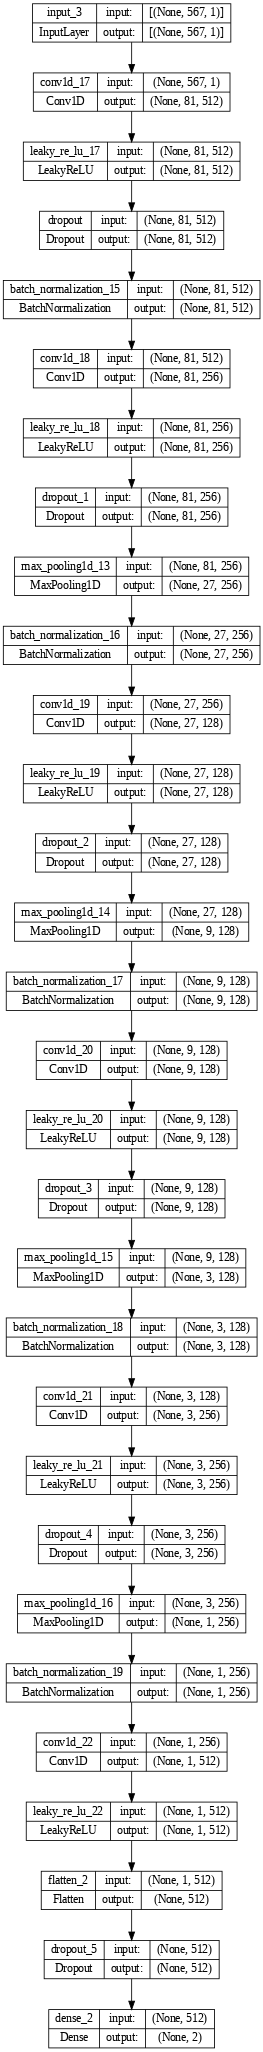

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



XTrain1.shape:  (218186, 567, 1)
YTrain1.shape:  (218186, 2)
XTrain1V.shape:  (26155, 567, 1)
YTrain1V.shape:  (26155, 2)
Обучающая выборка X_Train1 - Целевых: 136753; Нецелевых: 81433
Валидационная выборка X_Train1V - Целевых: 16400; Нецелевых: 9755
Epoch 1/20
6819/6819 [==============================] - 98s 13ms/step - loss: 0.6204 - accuracy: 0.6669 - val_loss: 0.6670 - val_accuracy: 0.6822
Epoch 2/20
6819/6819 [==============================] - 90s 13ms/step - loss: 0.5448 - accuracy: 0.7222 - val_loss: 0.6017 - val_accuracy: 0.6163
Epoch 3/20
6819/6819 [==============================] - 87s 13ms/step - loss: 0.5182 - accuracy: 0.7373 - val_loss: 0.5710 - val_accuracy: 0.7331
Epoch 4/20
6819/6819 [==============================] - 87s 13ms/step - loss: 0.5022 - accuracy: 0.7458 - val_loss: 0.5494 - val_accuracy: 0.7420
Epoch 5/20
6819/6819 [==============================] - 90s 13ms/step - loss: 0.4934 - accuracy: 0.7506 - val_loss: 0.5190 - val_accuracy: 0.7466
Epoch 6/20
6819/68

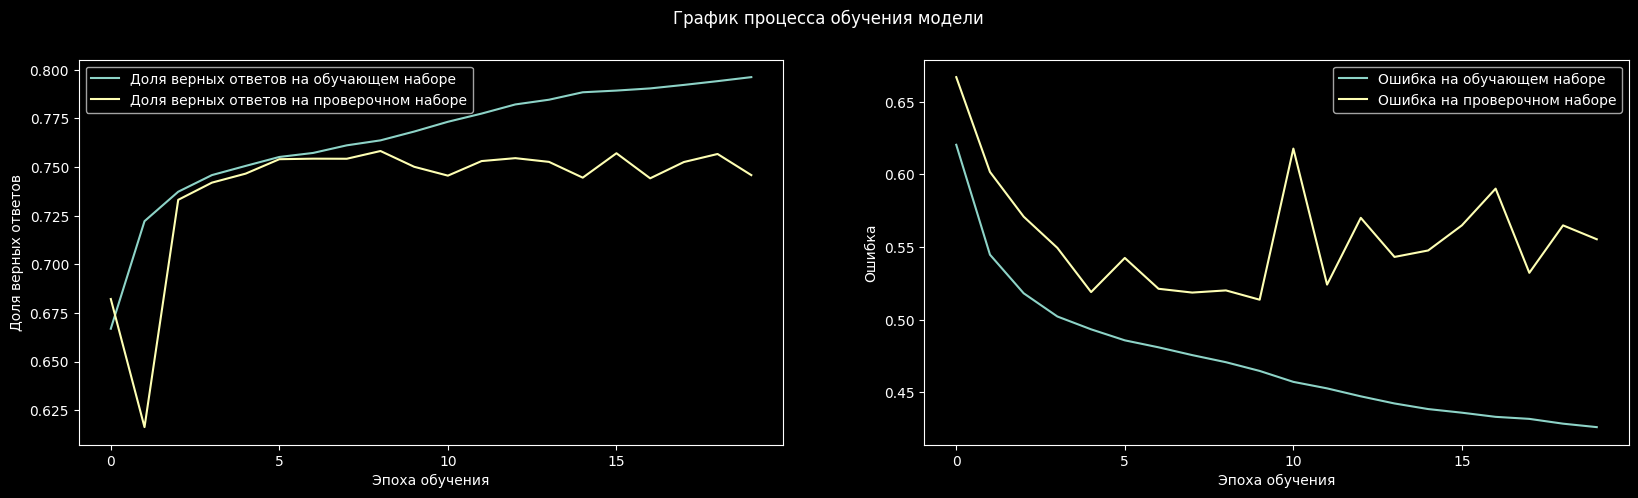

Завершён блок [0_50] - 1-й из 113 

Запущен блок [50_100] - 2-й из 113
[50-100]=> Headliner: № 51 -> Длина записи: 3536111; Маркер выборки: 1; Число нарезок: 6236
[50-100]=> Headliner: № 52 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1498
[50-100]=> Headliner: № 53 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1498
[50-100]=> Headliner: № 54 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1498
[50-100]=> Headliner: № 55 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1498
[50-100]=> Headliner: № 56 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1498
[50-100]=> Headliner: № 57 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1498
[50-100]=> Headliner: № 58 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1498
[50-100]=> Headliner: № 59 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1498
[50-100]=> Headliner: № 60 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1498
[50-100]=> Headlin

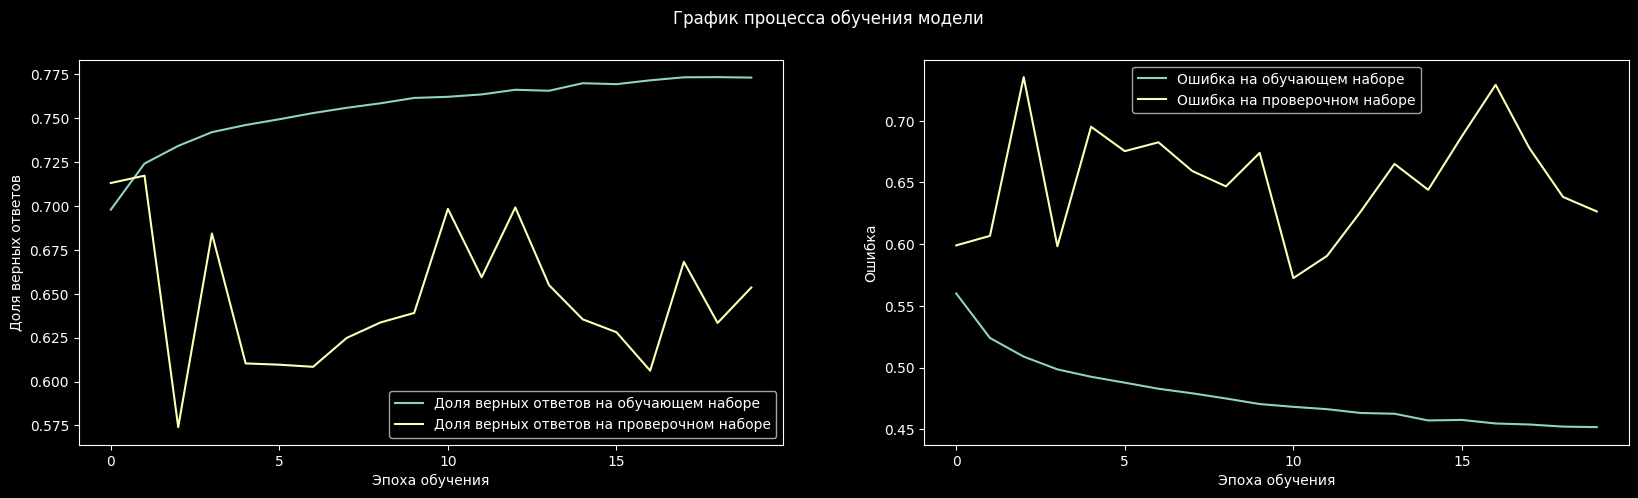

Завершён блок [50_100] - 2-й из 113 

Запущен блок [100_150] - 3-й из 113
[100-150]=> Headliner: № 101 -> Длина записи: 4387439; Маркер выборки: 1; Число нарезок: 7737
[100-150]=> Headliner: № 102 -> Длина записи: 731567; Маркер выборки: 1; Число нарезок: 1290
[100-150]=> Headliner: № 103 -> Длина записи: 2681903; Маркер выборки: 1; Число нарезок: 4729
[100-150]=> Headliner: № 104 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 2016
[100-150]=> Headliner: № 105 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 2016
[100-150]=> Headliner: № 106 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 2016
[100-150]=> Headliner: № 107 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 2016
[100-150]=> Headliner: № 108 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 2016
[100-150]=> Headliner: № 109 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 2016
[100-150]=> Headliner: № 110 -> Длина записи: 1143407; Маркер выборки: 0; Число н

In [ ]:
with timex():
  neuro_au()

- - 7 вариант + балансировка0:
  - нарезка 2182
  - модель Conv1D: 256 [128, 64, 32, 16, 8, 4] 2
  - плюс 6 вариант

Длина нарезки аудиофайлов:  2187

Запущен блок [0_50] - 1-й из 113
[0-50]=> Headliner: № 1 -> Длина записи: 627311; Маркер выборки: 0; Число нарезок: 286
[0-50]=> Headliner: № 2 -> Длина записи: 3149039; Маркер выборки: 1; Число нарезок: 1439
[0-50]=> Headliner: № 3 -> Длина записи: 3586223; Маркер выборки: 1; Число нарезок: 1639
[0-50]=> Headliner: № 4 -> Длина записи: 3575279; Маркер выборки: 1; Число нарезок: 1634
[0-50]=> Headliner: № 5 -> Длина записи: 1376111; Маркер выборки: 1; Число нарезок: 629
[0-50]=> Headliner: № 6 -> Длина записи: 2518319; Маркер выборки: 1; Число нарезок: 1151
[0-50]=> Headliner: № 7 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 656
[0-50]=> Headliner: № 8 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 656
[0-50]=> Headliner: № 9 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 656
[0-50]=> Headliner: № 10 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 656
[0-50]=> Headliner: № 11 -> Длина записи: 1434863

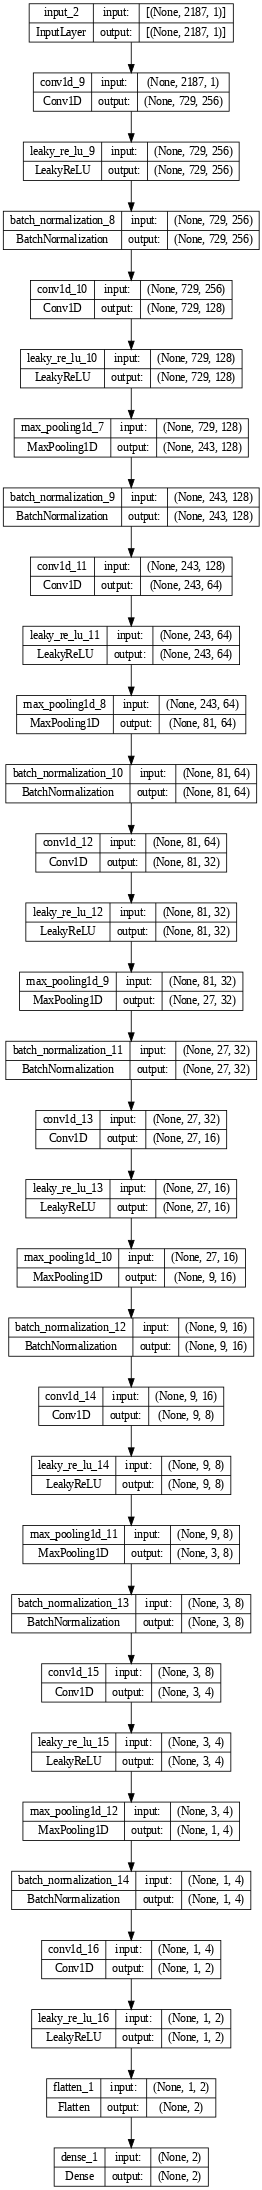


XTrain1.shape:  (56466, 2187, 1)
YTrain1.shape:  (56466, 2)
XTrain1V.shape:  (6746, 2187, 1)
YTrain1V.shape:  (6746, 2)
Обучающая выборка X_Train1 - Целевых: 35393; Нецелевых: 21073
Валидационная выборка X_Train1V - Целевых: 4236; Нецелевых: 2510
Epoch 1/20
1765/1765 [==============================] - 51s 25ms/step - loss: 0.4546 - accuracy: 0.7827 - val_loss: 0.4021 - val_accuracy: 0.8135
Epoch 2/20
1765/1765 [==============================] - 44s 25ms/step - loss: 0.3466 - accuracy: 0.8422 - val_loss: 0.3562 - val_accuracy: 0.8380
Epoch 3/20
1765/1765 [==============================] - 42s 24ms/step - loss: 0.2914 - accuracy: 0.8747 - val_loss: 0.5323 - val_accuracy: 0.7388
Epoch 4/20
1765/1765 [==============================] - 43s 25ms/step - loss: 0.2577 - accuracy: 0.8944 - val_loss: 1.6174 - val_accuracy: 0.5817
Epoch 5/20
1765/1765 [==============================] - 42s 24ms/step - loss: 0.2374 - accuracy: 0.9036 - val_loss: 0.4050 - val_accuracy: 0.8441
Epoch 6/20
1765/1765 [

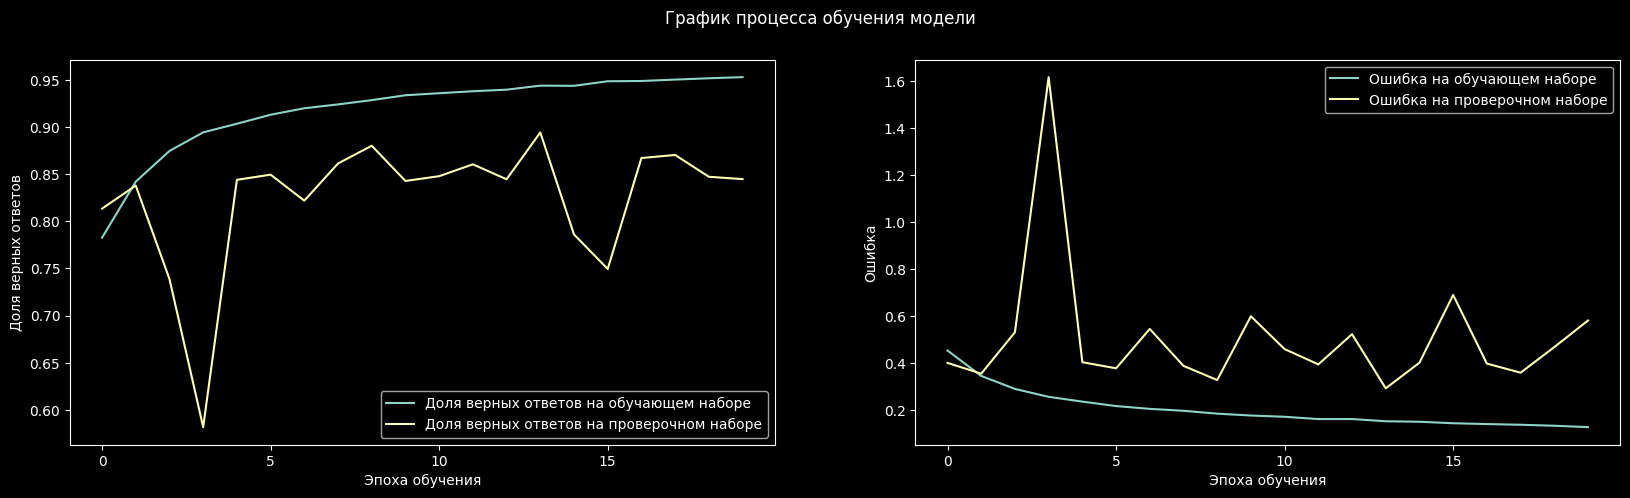

Завершён блок [0_50] - 1-й из 113 

Запущен блок [50_100] - 2-й из 113
[50-100]=> Headliner: № 51 -> Длина записи: 3536111; Маркер выборки: 1; Число нарезок: 1616
[50-100]=> Headliner: № 52 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 388
[50-100]=> Headliner: № 53 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 388
[50-100]=> Headliner: № 54 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 388
[50-100]=> Headliner: № 55 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 388
[50-100]=> Headliner: № 56 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 388
[50-100]=> Headliner: № 57 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 388
[50-100]=> Headliner: № 58 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 388
[50-100]=> Headliner: № 59 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 388
[50-100]=> Headliner: № 60 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 388
[50-100]=> Headliner: № 61 

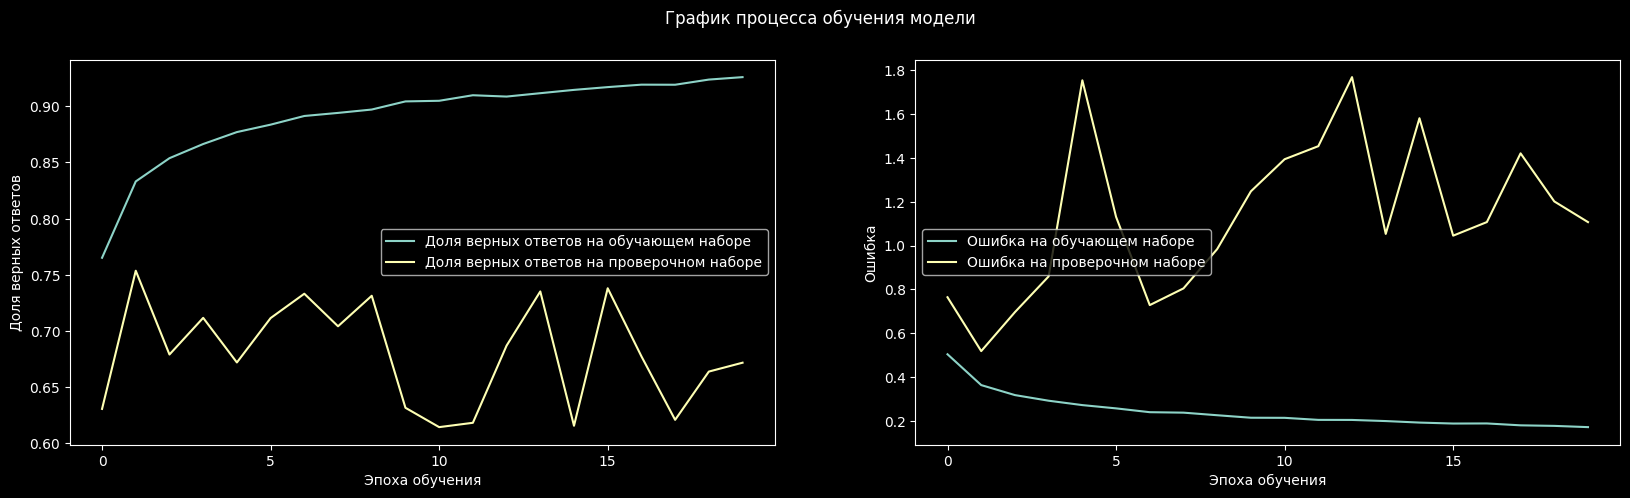

Завершён блок [50_100] - 2-й из 113 

Запущен блок [100_150] - 3-й из 113
[100-150]=> Headliner: № 101 -> Длина записи: 4387439; Маркер выборки: 1; Число нарезок: 2006
[100-150]=> Headliner: № 102 -> Длина записи: 731567; Маркер выборки: 1; Число нарезок: 334
[100-150]=> Headliner: № 103 -> Длина записи: 2681903; Маркер выборки: 1; Число нарезок: 1226
[100-150]=> Headliner: № 104 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 522
[100-150]=> Headliner: № 105 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 522
[100-150]=> Headliner: № 106 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 522
[100-150]=> Headliner: № 107 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 522
[100-150]=> Headliner: № 108 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 522
[100-150]=> Headliner: № 109 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 522
[100-150]=> Headliner: № 110 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок:

KeyboardInterrupt: ignored

In [ ]:
with timex():
  neuro_au()



---



- - 6 вариант + балансировка0:
  - нарезка 6561
  - модель Conv1D: 512 [256, 128, 64, 32, 16, 8, 4] 2
  - LeakyReLu(alpha=1.0)
  - MaxPooling1D вернулся вместо AveragePooling1D
  - минус Dropout на послднем слое
  - минус SpatialDropout1D



Длина нарезки аудиофайлов:  6561

Запущен блок [0_50] - 1-й из 113
[0-50]=> Headliner: № 1 -> Длина записи: 627311; Маркер выборки: 0; Число нарезок: 95
[0-50]=> Headliner: № 2 -> Длина записи: 3149039; Маркер выборки: 1; Число нарезок: 479
[0-50]=> Headliner: № 3 -> Длина записи: 3586223; Маркер выборки: 1; Число нарезок: 546
[0-50]=> Headliner: № 4 -> Длина записи: 3575279; Маркер выборки: 1; Число нарезок: 544
[0-50]=> Headliner: № 5 -> Длина записи: 1376111; Маркер выборки: 1; Число нарезок: 209
[0-50]=> Headliner: № 6 -> Длина записи: 2518319; Маркер выборки: 1; Число нарезок: 383
[0-50]=> Headliner: № 7 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 218
[0-50]=> Headliner: № 8 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 218
[0-50]=> Headliner: № 9 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 218
[0-50]=> Headliner: № 10 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 218
[0-50]=> Headliner: № 11 -> Длина записи: 1434863; Мар

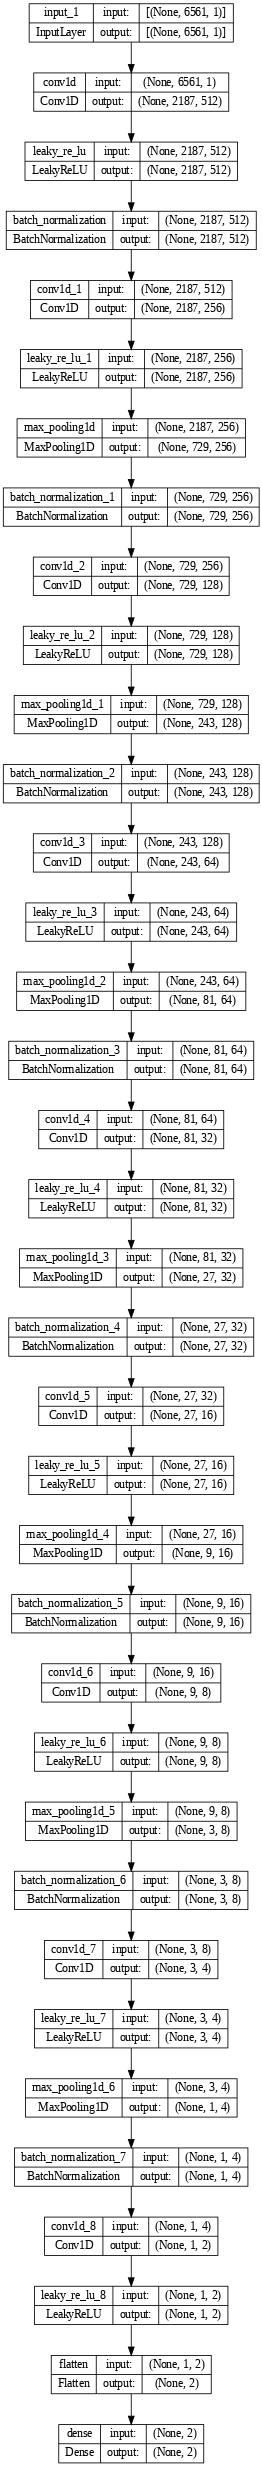

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



XTrain1.shape:  (18787, 6561, 1)
YTrain1.shape:  (18787, 2)
XTrain1V.shape:  (2230, 6561, 1)
YTrain1V.shape:  (2230, 2)
Обучающая выборка X_Train1 - Целевых: 11782; Нецелевых: 7005
Валидационная выборка X_Train1V - Целевых: 1406; Нецелевых: 824
Время обработки: 56.04 с


NameError: ignored

In [ ]:
with timex():
  neuro_au()

Длина нарезки аудиофайлов:  6561

Запущен блок [0_50] - 1-й из 113

Блок [0_50] был сохранён, переходим к обучению...
Читаем модель с диска...

XTrain1.shape:  (18787, 6561, 1)
YTrain1.shape:  (18787, 2)
XTrain1V.shape:  (2230, 6561, 1)
YTrain1V.shape:  (2230, 2)
Обучающая выборка X_Train1 - Целевых: 0; Нецелевых: 0
Валидационная выборка X_Train1V - Целевых: 0; Нецелевых: 0
Epoch 1/20
294/294 [==============================] - 85s 224ms/step - loss: 0.4025 - accuracy: 0.8313 - val_loss: 1.1557 - val_accuracy: 0.3848
Epoch 2/20
294/294 [==============================] - 65s 221ms/step - loss: 0.2550 - accuracy: 0.8893 - val_loss: 0.3631 - val_accuracy: 0.8090
Epoch 3/20
294/294 [==============================] - 66s 224ms/step - loss: 0.2123 - accuracy: 0.9089 - val_loss: 0.5472 - val_accuracy: 0.8462
Epoch 4/20
294/294 [==============================] - 66s 223ms/step - loss: 0.1823 - accuracy: 0.9234 - val_loss: 0.7708 - val_accuracy: 0.7619
Epoch 5/20
294/294 [=======================

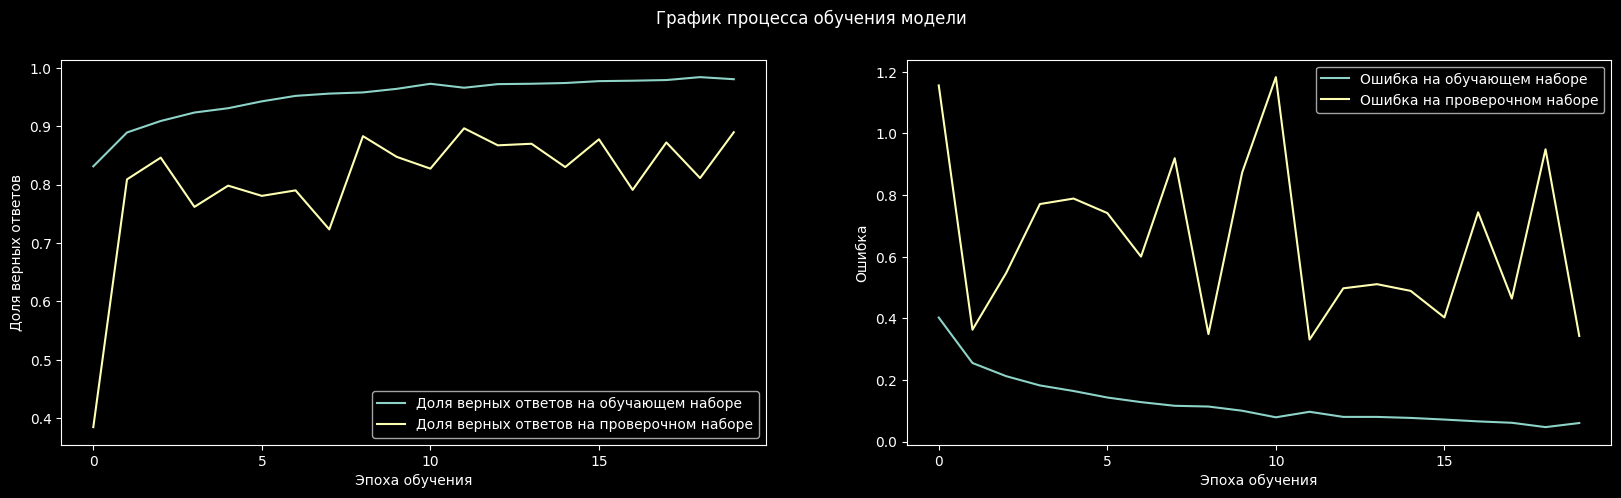

Завершён блок [0_50] - 1-й из 113 

Запущен блок [50_100] - 2-й из 113
[50-100]=> Headliner: № 1 -> Длина записи: 3536111; Маркер выборки: 1; Число нарезок: 538
[50-100]=> Headliner: № 2 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 3 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 4 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 5 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 6 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 7 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 8 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 9 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 10 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 11 -> Длина з

NameError: ignored

In [ ]:
with timex():
  neuro_au()



---



- - 5 вариант + балансировка0:
  - нарезка 6561
  - модель Conv1D: 512 [256, 128, 64, 32, 16, 8, 4] 2
  - LeakyReLu(alpha=1.0)
  - AveragePooling1D
  - SpatialDropout1D



Длина нарезки аудиофайлов:  6561

Запущен блок [0_50] - 1-й из 113
[0-50]=> Headliner: № 1 -> Длина записи: 627311; Маркер выборки: 0; Число нарезок: 95
[0-50]=> Headliner: № 2 -> Длина записи: 3149039; Маркер выборки: 1; Число нарезок: 479
[0-50]=> Headliner: № 3 -> Длина записи: 3586223; Маркер выборки: 1; Число нарезок: 546
[0-50]=> Headliner: № 4 -> Длина записи: 3575279; Маркер выборки: 1; Число нарезок: 544
[0-50]=> Headliner: № 5 -> Длина записи: 1376111; Маркер выборки: 1; Число нарезок: 209
[0-50]=> Headliner: № 6 -> Длина записи: 2518319; Маркер выборки: 1; Число нарезок: 383
[0-50]=> Headliner: № 7 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 218
[0-50]=> Headliner: № 8 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 218
[0-50]=> Headliner: № 9 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 218
[0-50]=> Headliner: № 10 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 218
[0-50]=> Headliner: № 11 -> Длина записи: 1434863; Мар

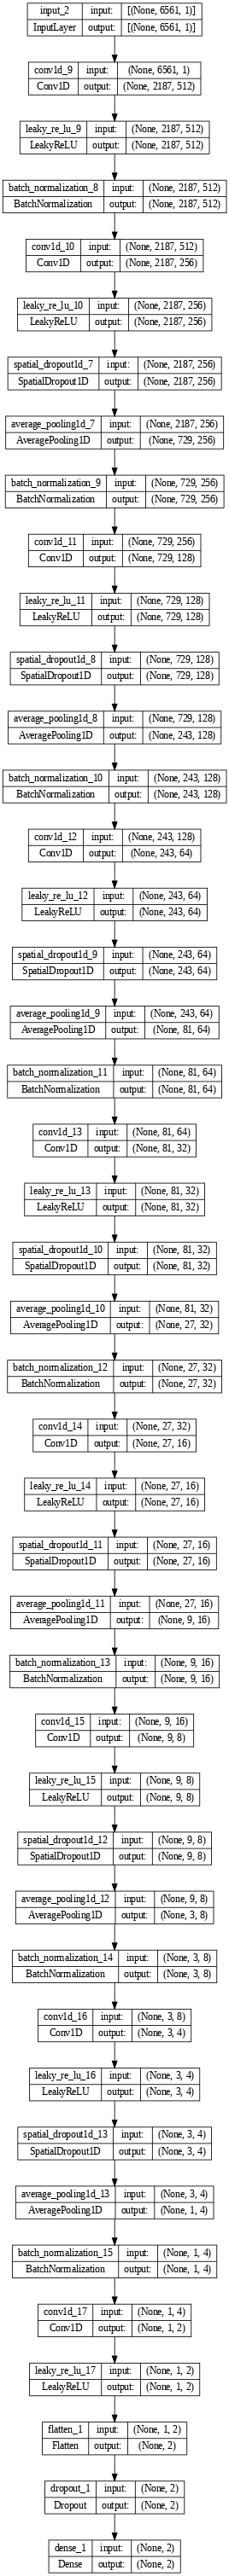


XTrain1.shape:  (18787, 6561, 1)
YTrain1.shape:  (18787, 2)
XTrain1V.shape:  (2230, 6561, 1)
YTrain1V.shape:  (2230, 2)
Обучающая выборка X_Train1 - Целевых: 11782; Нецелевых: 7005
Валидационная выборка X_Train1V - Целевых: 1406; Нецелевых: 824
Epoch 1/20
294/294 [==============================] - 75s 230ms/step - loss: 0.6721 - accuracy: 0.6109 - val_loss: 0.6595 - val_accuracy: 0.6305
Epoch 2/20
294/294 [==============================] - 64s 218ms/step - loss: 0.6609 - accuracy: 0.6272 - val_loss: 0.6597 - val_accuracy: 0.6305
Epoch 3/20
294/294 [==============================] - 65s 222ms/step - loss: 0.6606 - accuracy: 0.6271 - val_loss: 0.6594 - val_accuracy: 0.6305
Epoch 4/20
294/294 [==============================] - 66s 224ms/step - loss: 0.6594 - accuracy: 0.6269 - val_loss: 0.6587 - val_accuracy: 0.6283
Epoch 5/20
294/294 [==============================] - 66s 224ms/step - loss: 0.6589 - accuracy: 0.6270 - val_loss: 0.7049 - val_accuracy: 0.6305
Epoch 6/20
294/294 [=========

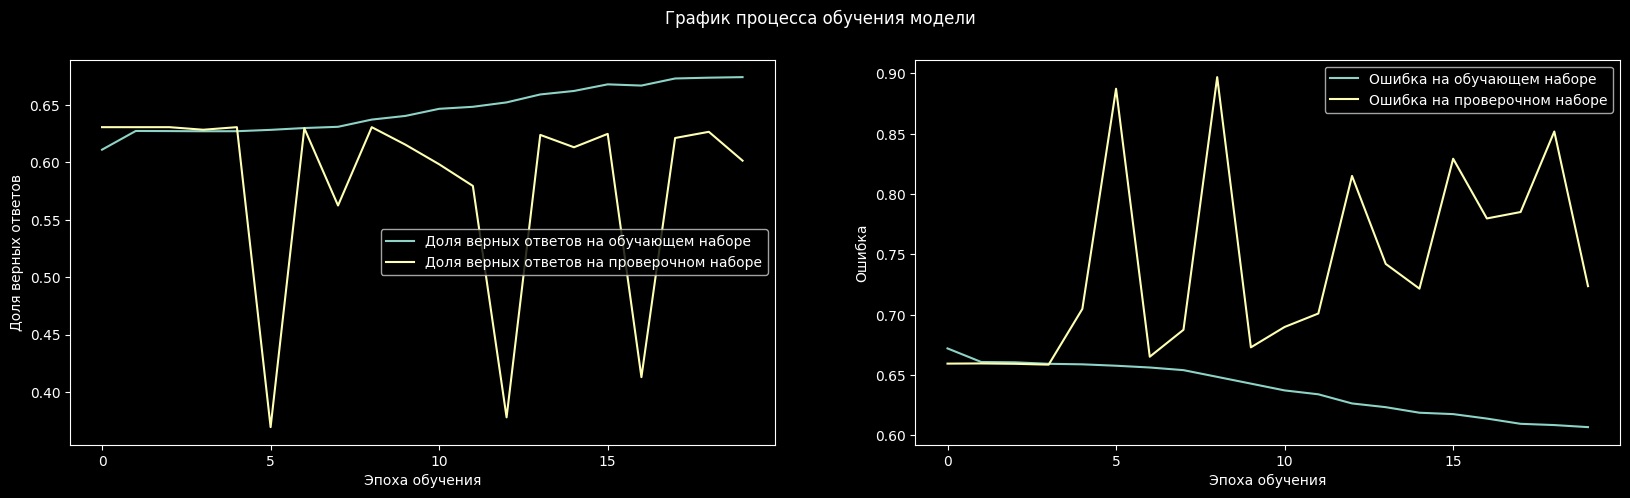

Завершён блок [0_50] - 1-й из 113 

Запущен блок [50_100] - 2-й из 113
[50-100]=> Headliner: № 51 -> Длина записи: 3536111; Маркер выборки: 1; Число нарезок: 538
[50-100]=> Headliner: № 52 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 53 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 54 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 55 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 56 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 57 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 58 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 59 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 60 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 129
[50-100]=> Headliner: № 61 -

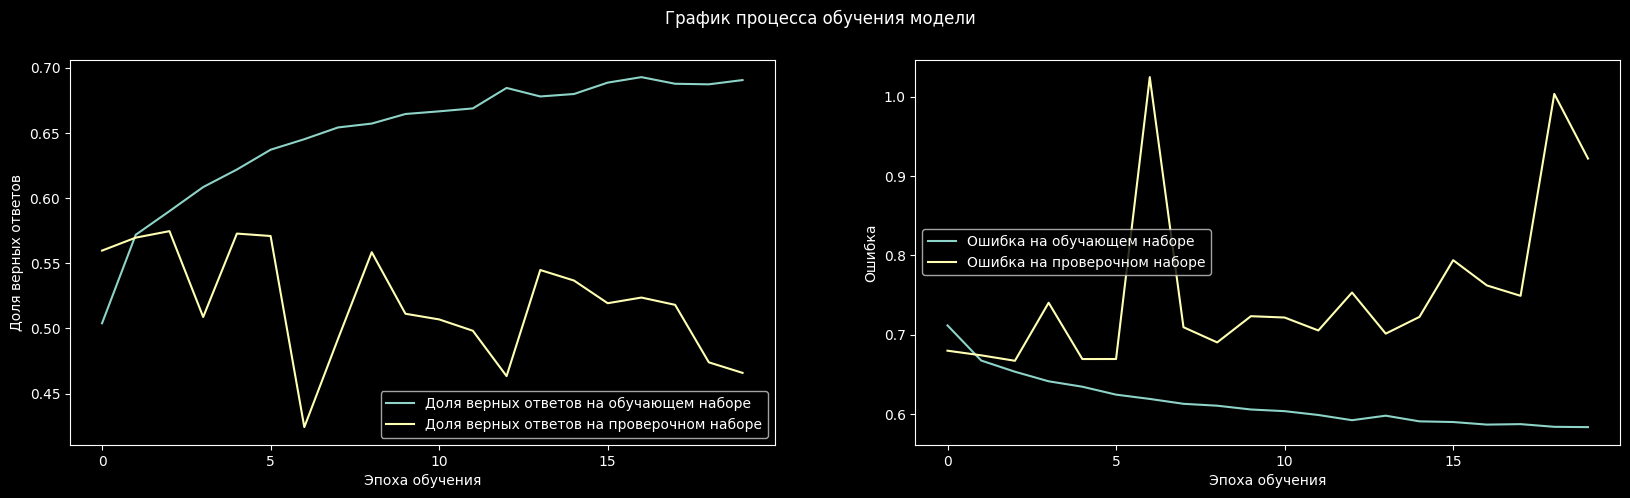

Завершён блок [50_100] - 2-й из 113 

Запущен блок [100_150] - 3-й из 113
[100-150]=> Headliner: № 101 -> Длина записи: 4387439; Маркер выборки: 1; Число нарезок: 668
[100-150]=> Headliner: № 102 -> Длина записи: 731567; Маркер выборки: 1; Число нарезок: 111
[100-150]=> Headliner: № 103 -> Длина записи: 2681903; Маркер выборки: 1; Число нарезок: 408
[100-150]=> Headliner: № 104 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 174
[100-150]=> Headliner: № 105 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 174
[100-150]=> Headliner: № 106 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 174
[100-150]=> Headliner: № 107 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 174
[100-150]=> Headliner: № 108 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 174
[100-150]=> Headliner: № 109 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 174
[100-150]=> Headliner: № 110 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 1

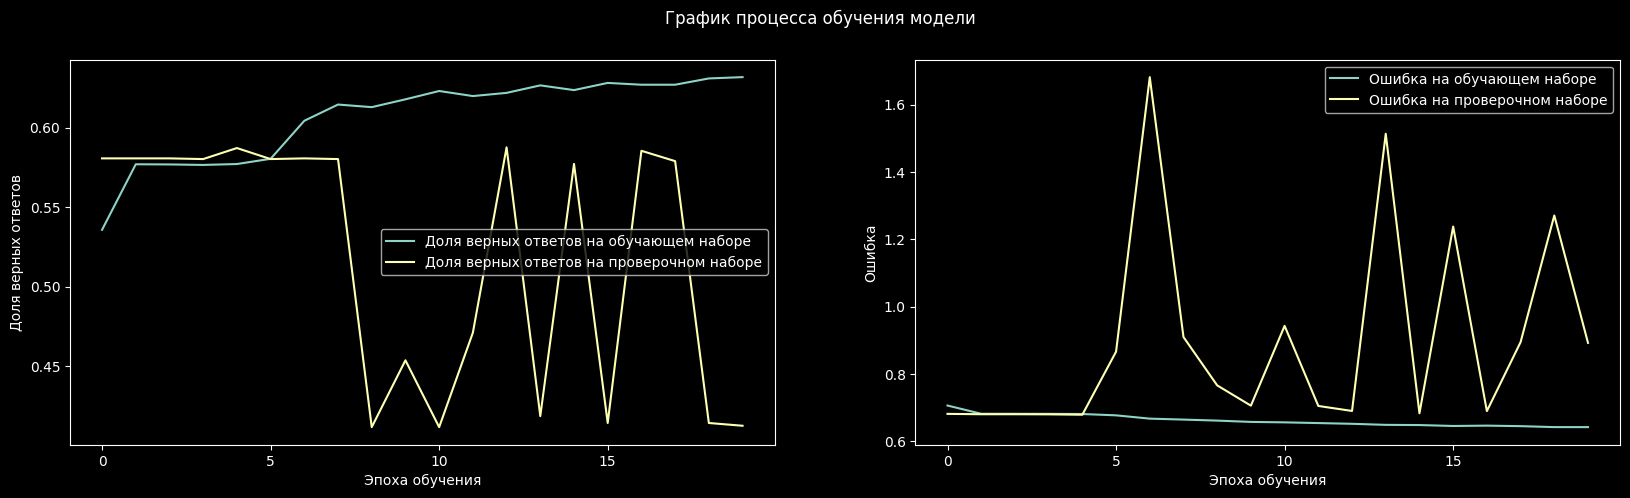

Завершён блок [100_150] - 3-й из 113 

Запущен блок [150_200] - 4-й из 113
[150-200]=> Headliner: № 151 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-200]=> Headliner: № 152 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-200]=> Headliner: № 153 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-200]=> Headliner: № 154 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-200]=> Headliner: № 155 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-200]=> Headliner: № 156 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-200]=> Headliner: № 157 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-200]=> Headliner: № 158 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-200]=> Headliner: № 159 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-200]=> Headliner: № 160 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 109
[150-

KeyboardInterrupt: ignored

In [ ]:
with timex():
  neuro_au()



---



- 4 вариант + балансировка0:
  - нарезка 729
  - модель Conv1D: 512 [256, 128, 64, 128, 256] 512
  - LeakyReLu(alpha=1.0)



Длина нарезки аудиофайлов:  729

Запущен блок [0_50] - 1-й из 113
[0-50]=> Headliner: № 1 -> Длина записи: 627311; Маркер выборки: 0; Число нарезок: 860
[0-50]=> Headliner: № 2 -> Длина записи: 3149039; Маркер выборки: 1; Число нарезок: 4319
[0-50]=> Headliner: № 3 -> Длина записи: 3586223; Маркер выборки: 1; Число нарезок: 4919
[0-50]=> Headliner: № 4 -> Длина записи: 3575279; Маркер выборки: 1; Число нарезок: 4904
[0-50]=> Headliner: № 5 -> Длина записи: 1376111; Маркер выборки: 1; Число нарезок: 1887
[0-50]=> Headliner: № 6 -> Длина записи: 2518319; Маркер выборки: 1; Число нарезок: 3454
[0-50]=> Headliner: № 7 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 1968
[0-50]=> Headliner: № 8 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 1968
[0-50]=> Headliner: № 9 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 1968
[0-50]=> Headliner: № 10 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 1968
[0-50]=> Headliner: № 11 -> Длина записи: 143

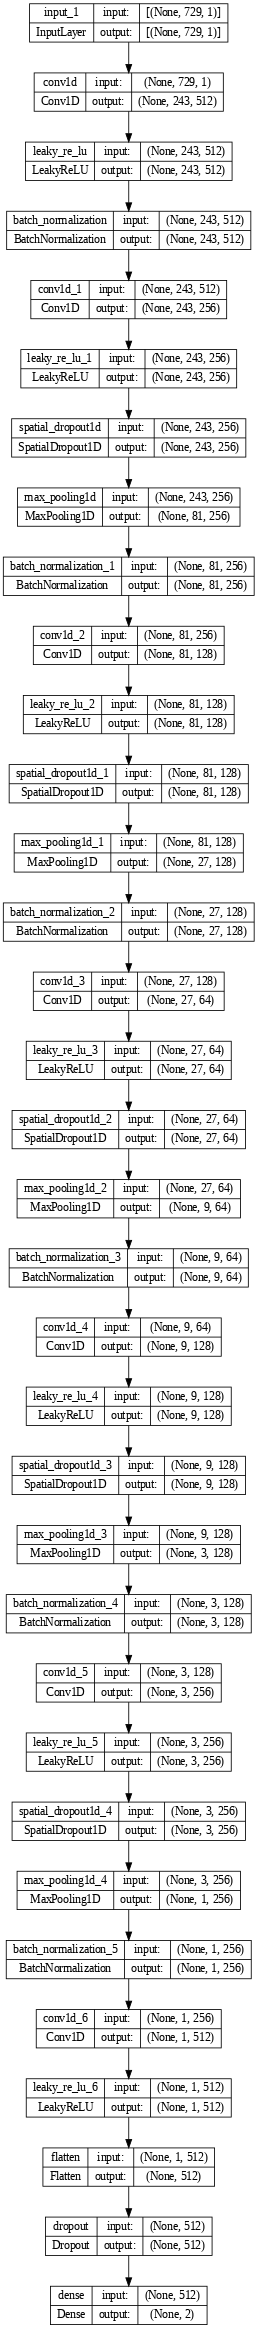

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



XTrain1.shape:  (169616, 729, 1)
YTrain1.shape:  (169616, 2)
XTrain1V.shape:  (20334, 729, 1)
YTrain1V.shape:  (20334, 2)
Обучающая выборка X_Train1 - Целевых: 106317; Нецелевых: 63299
Валидационная выборка X_Train1V - Целевых: 12748; Нецелевых: 7586
Epoch 1/20
332/332 [==============================] - 72s 196ms/step - loss: 0.6020 - accuracy: 0.6860 - val_loss: 0.6073 - val_accuracy: 0.6651
Epoch 2/20
332/332 [==============================] - 62s 187ms/step - loss: 0.4695 - accuracy: 0.7693 - val_loss: 0.4348 - val_accuracy: 0.7795
Epoch 3/20
332/332 [==============================] - 63s 189ms/step - loss: 0.3999 - accuracy: 0.8201 - val_loss: 0.3952 - val_accuracy: 0.8419
Epoch 4/20
332/332 [==============================] - 62s 188ms/step - loss: 0.3647 - accuracy: 0.8435 - val_loss: 0.3359 - val_accuracy: 0.8552
Epoch 5/20
332/332 [==============================] - 63s 188ms/step - loss: 0.3394 - accuracy: 0.8572 - val_loss: 0.3537 - val_accuracy: 0.8559
Epoch 6/20
332/332 [===

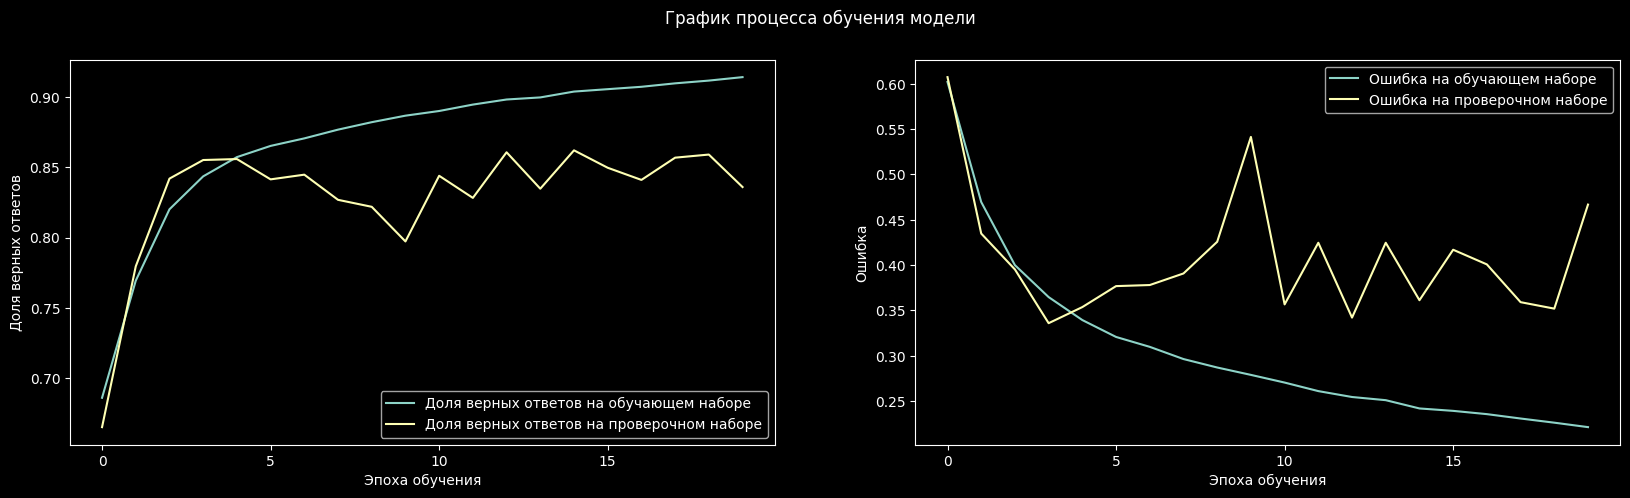

Завершён блок [0_50] - 1-й из 113 

Запущен блок [50_100] - 2-й из 113
[50-100]=> Headliner: № 51 -> Длина записи: 3536111; Маркер выборки: 1; Число нарезок: 4850
[50-100]=> Headliner: № 52 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1165
[50-100]=> Headliner: № 53 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1165
[50-100]=> Headliner: № 54 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1165
[50-100]=> Headliner: № 55 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1165
[50-100]=> Headliner: № 56 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1165
[50-100]=> Headliner: № 57 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1165
[50-100]=> Headliner: № 58 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1165
[50-100]=> Headliner: № 59 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1165
[50-100]=> Headliner: № 60 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 1165
[50-100]=> Headlin

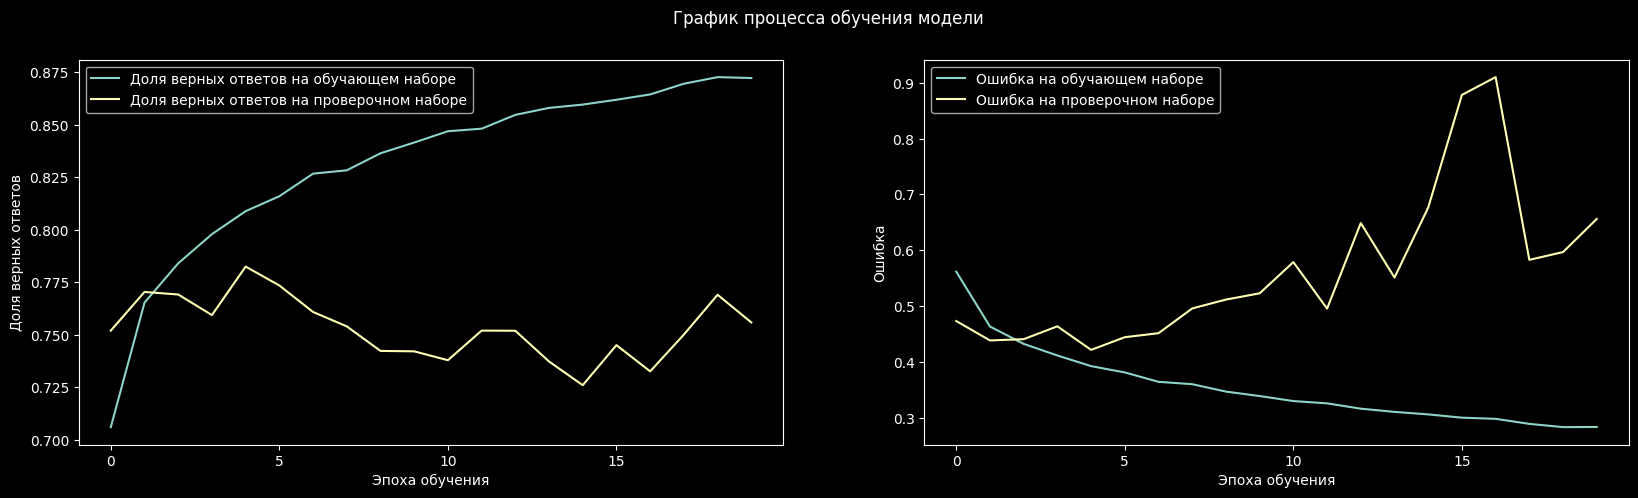

Завершён блок [50_100] - 2-й из 113 

Запущен блок [100_150] - 3-й из 113
[100-150]=> Headliner: № 101 -> Длина записи: 4387439; Маркер выборки: 1; Число нарезок: 6018
[100-150]=> Headliner: № 102 -> Длина записи: 731567; Маркер выборки: 1; Число нарезок: 1003
[100-150]=> Headliner: № 103 -> Длина записи: 2681903; Маркер выборки: 1; Число нарезок: 3678
[100-150]=> Headliner: № 104 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 1568
[100-150]=> Headliner: № 105 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 1568
[100-150]=> Headliner: № 106 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 1568
[100-150]=> Headliner: № 107 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 1568
[100-150]=> Headliner: № 108 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 1568
[100-150]=> Headliner: № 109 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 1568
[100-150]=> Headliner: № 110 -> Длина записи: 1143407; Маркер выборки: 0; Число н

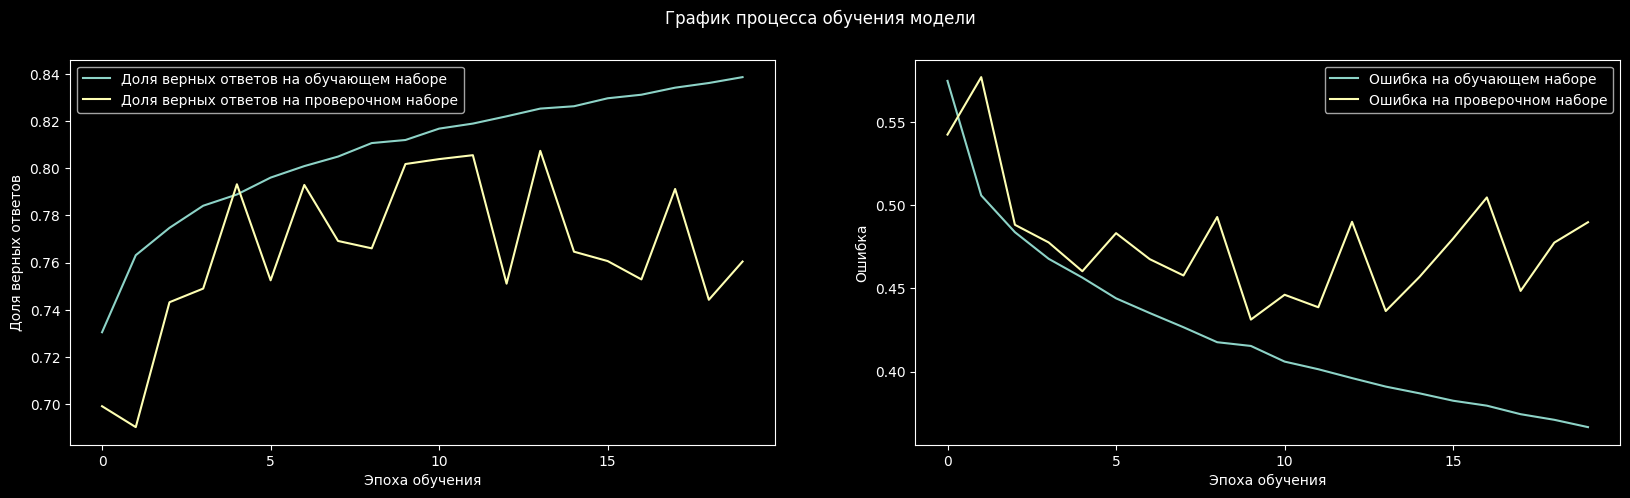

Завершён блок [100_150] - 3-й из 113 

Запущен блок [150_200] - 4-й из 113
[150-200]=> Headliner: № 151 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-200]=> Headliner: № 152 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-200]=> Headliner: № 153 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-200]=> Headliner: № 154 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-200]=> Headliner: № 155 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-200]=> Headliner: № 156 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-200]=> Headliner: № 157 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-200]=> Headliner: № 158 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-200]=> Headliner: № 159 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-200]=> Headliner: № 160 -> Длина записи: 719471; Маркер выборки: 0; Число нарезок: 986
[150-

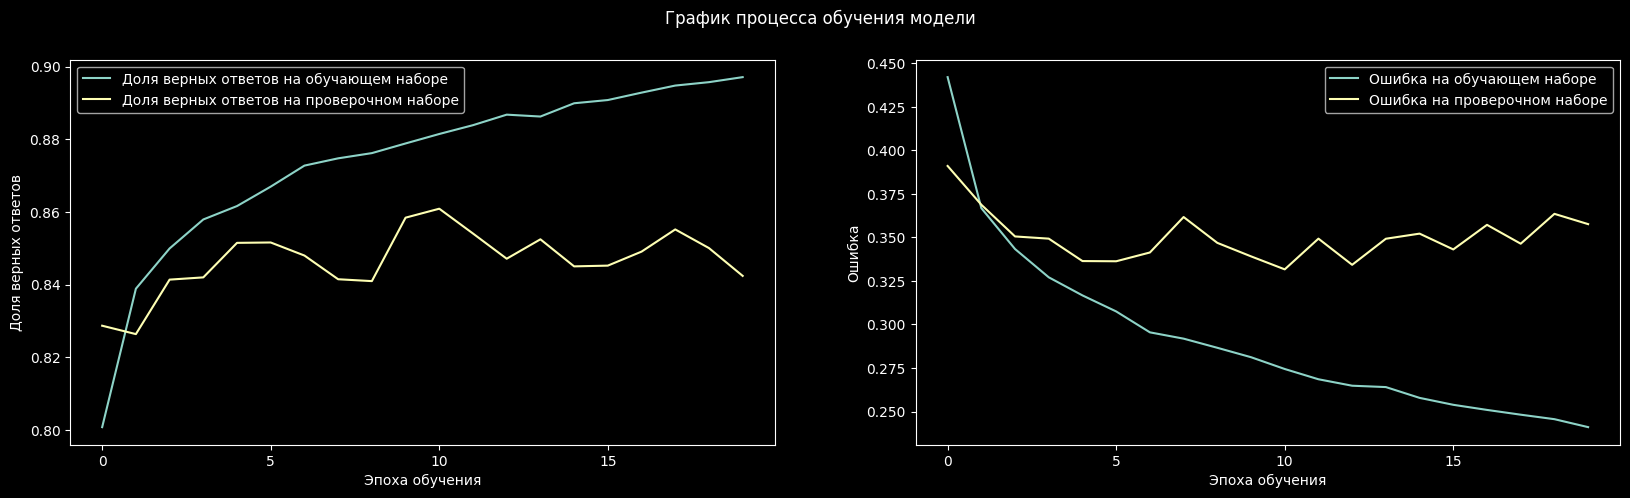

Завершён блок [150_200] - 4-й из 113 

Запущен блок [200_250] - 5-й из 113
[200-250]=> Headliner: № 201 -> Длина записи: 1700399; Маркер выборки: 0; Число нарезок: 2332
[200-250]=> Headliner: № 202 -> Длина записи: 1700399; Маркер выборки: 0; Число нарезок: 2332
[200-250]=> Headliner: № 203 -> Длина записи: 3075311; Маркер выборки: 1; Число нарезок: 4218
[200-250]=> Headliner: № 204 -> Длина записи: 5769263; Маркер выборки: 1; Число нарезок: 7913
[200-250]=> Headliner: № 205 -> Длина записи: 3794159; Маркер выборки: 1; Число нарезок: 5204
[200-250]=> Headliner: № 206 -> Длина записи: 1497647; Маркер выборки: 1; Число нарезок: 2054
[200-250]=> Headliner: № 207 -> Длина записи: 3601199; Маркер выборки: 1; Число нарезок: 4939
[200-250]=> Headliner: № 208 -> Длина записи: 687791; Маркер выборки: 0; Число нарезок: 943
[200-250]=> Headliner: № 209 -> Длина записи: 687791; Маркер выборки: 0; Число нарезок: 943
[200-250]=> Headliner: № 210 -> Длина записи: 687791; Маркер выборки: 0; Число наре

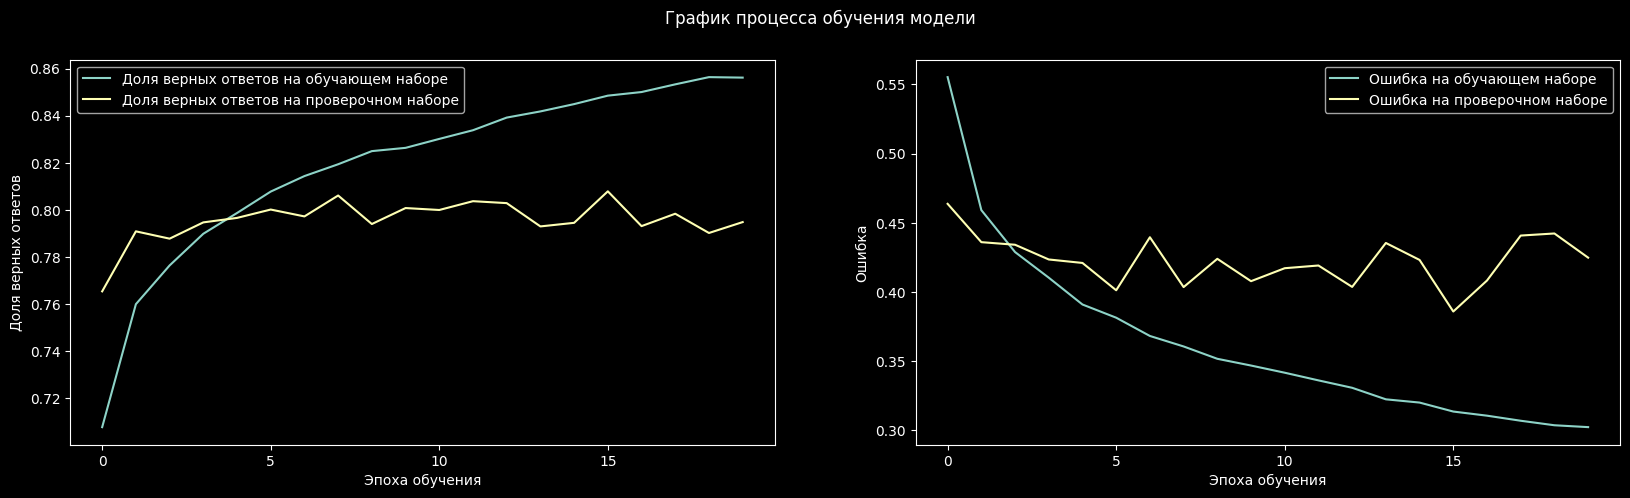

Завершён блок [200_250] - 5-й из 113 

Запущен блок [250_300] - 6-й из 113
[250-300]=> Headliner: № 251 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-300]=> Headliner: № 252 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-300]=> Headliner: № 253 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-300]=> Headliner: № 254 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-300]=> Headliner: № 255 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-300]=> Headliner: № 256 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-300]=> Headliner: № 257 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-300]=> Headliner: № 258 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-300]=> Headliner: № 259 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-300]=> Headliner: № 260 -> Длина записи: 620399; Маркер выборки: 0; Число нарезок: 851
[250-

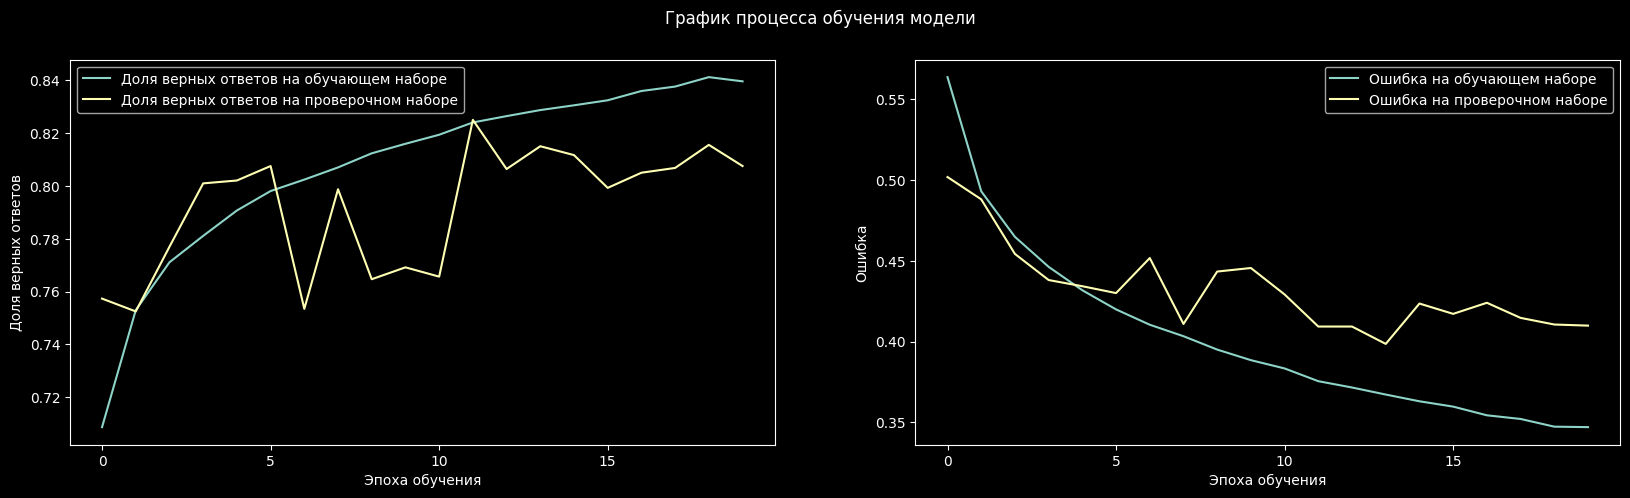

Завершён блок [250_300] - 6-й из 113 

Запущен блок [300_350] - 7-й из 113
[300-350]=> Headliner: № 301 -> Длина записи: 2676143; Маркер выборки: 1; Число нарезок: 3670
[300-350]=> Headliner: № 302 -> Длина записи: 2593775; Маркер выборки: 1; Число нарезок: 3557
[300-350]=> Headliner: № 303 -> Длина записи: 6835439; Маркер выборки: 1; Число нарезок: 9376
[300-350]=> Headliner: № 304 -> Длина записи: 2294831; Маркер выборки: 1; Число нарезок: 3147
[300-350]=> Headliner: № 305 -> Длина записи: 779375; Маркер выборки: 1; Число нарезок: 1069
[300-350]=> Headliner: № 306 -> Длина записи: 3459503; Маркер выборки: 1; Число нарезок: 4745
[300-350]=> Headliner: № 307 -> Длина записи: 1438319; Маркер выборки: 1; Число нарезок: 1973
[300-350]=> Headliner: № 308 -> Длина записи: 4523375; Маркер выборки: 1; Число нарезок: 6204
[300-350]=> Headliner: № 309 -> Длина записи: 3773423; Маркер выборки: 1; Число нарезок: 5176
[300-350]=> Headliner: № 310 -> Длина записи: 2243567; Маркер выборки: 1; Число 

In [ ]:
with timex():
  neuro_au()

In [ ]:
with timex():
  neuro_au()

- Третий вариант + балансировка0:
  - нарезка 243
  - модель Conv1D: 32 [64, 128, 128, 256] 256
  - LeakyReLu(alpha=1.0)

Длина нарезки аудиофайлов:  243

Запущен блок [0_50] - 1-й из 82
[0-50]=> Headliner: № 1 -> Длина записи: 627311; Маркер выборки: 0; Число нарезок: 2581
[0-50]=> Headliner: № 2 -> Длина записи: 3149039; Маркер выборки: 1; Число нарезок: 12959
[0-50]=> Headliner: № 3 -> Длина записи: 3586223; Маркер выборки: 1; Число нарезок: 14758
[0-50]=> Headliner: № 4 -> Длина записи: 3575279; Маркер выборки: 1; Число нарезок: 14713
[0-50]=> Headliner: № 5 -> Длина записи: 1376111; Маркер выборки: 1; Число нарезок: 5663
[0-50]=> Headliner: № 6 -> Длина записи: 2518319; Маркер выборки: 1; Число нарезок: 10363
[0-50]=> Headliner: № 7 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 5904
[0-50]=> Headliner: № 8 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 5904
[0-50]=> Headliner: № 9 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 5904
[0-50]=> Headliner: № 10 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 5904
[0-50]=> Headliner: № 11 -> Длина записи:

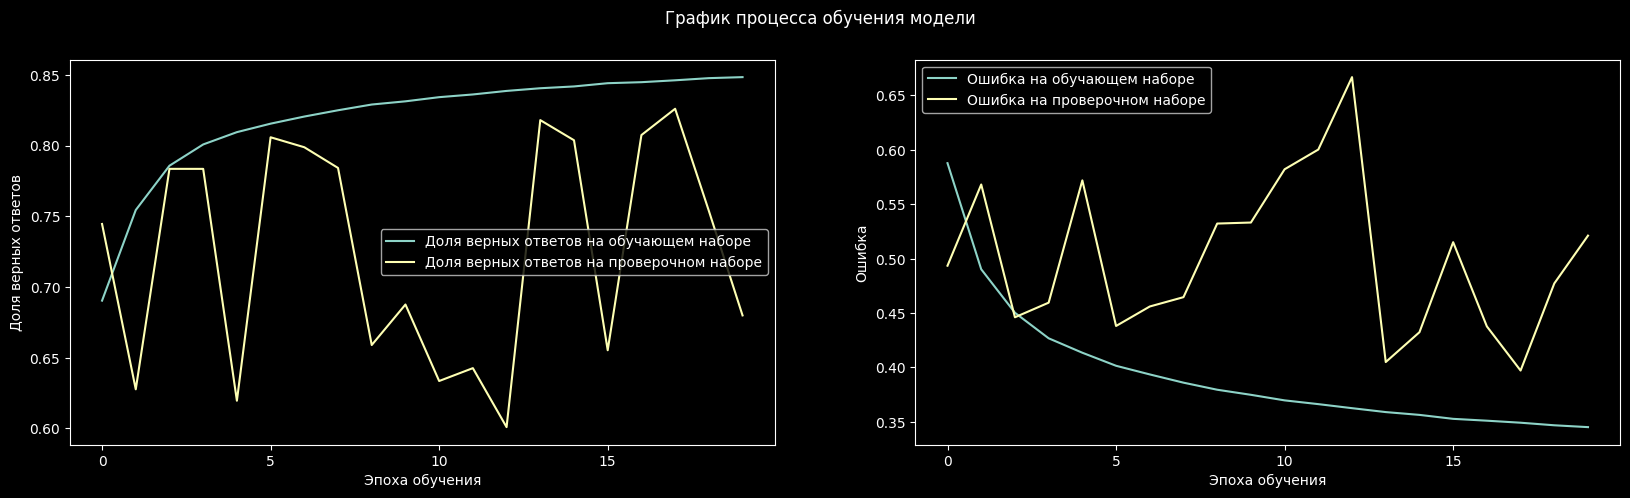

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Завершён блок [0_50] - 1-й из 82 

Запущен блок [50_100] - 2-й из 82
[50-100]=> Headliner: № 51 -> Длина записи: 3536111; Маркер выборки: 1; Число нарезок: 14551
[50-100]=> Headliner: № 52 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 3496
[50-100]=> Headliner: № 53 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 3496
[50-100]=> Headliner: № 54 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 3496
[50-100]=> Headliner: № 55 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 3496
[50-100]=> Headliner: № 56 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 3496
[50-100]=> Headliner: № 57 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 3496
[50-100]=> Headliner: № 58 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 3496
[50-100]=> Headliner: № 59 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 3496
[50-100]=> Headliner: № 60 -> Длина записи: 849647; Маркер выборки: 0; Число нарезок: 3496
[50-100]=> Headline

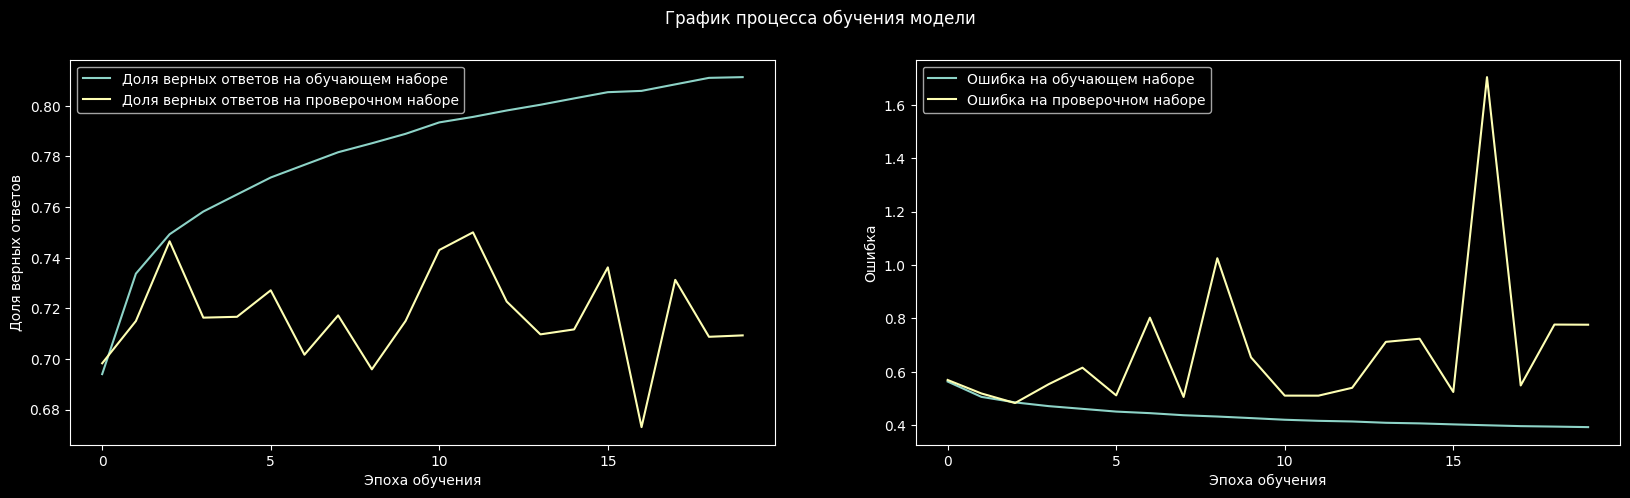

Завершён блок [50_100] - 2-й из 82 

Запущен блок [100_150] - 3-й из 82
[100-150]=> Headliner: № 101 -> Длина записи: 4387439; Маркер выборки: 1; Число нарезок: 18055
[100-150]=> Headliner: № 102 -> Длина записи: 731567; Маркер выборки: 1; Число нарезок: 3010
[100-150]=> Headliner: № 103 -> Длина записи: 2681903; Маркер выборки: 1; Число нарезок: 11036
[100-150]=> Headliner: № 104 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 4705
[100-150]=> Headliner: № 105 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 4705
[100-150]=> Headliner: № 106 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 4705
[100-150]=> Headliner: № 107 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 4705
[100-150]=> Headliner: № 108 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 4705
[100-150]=> Headliner: № 109 -> Длина записи: 1143407; Маркер выборки: 0; Число нарезок: 4705
[100-150]=> Headliner: № 110 -> Длина записи: 1143407; Маркер выборки: 0; Число н

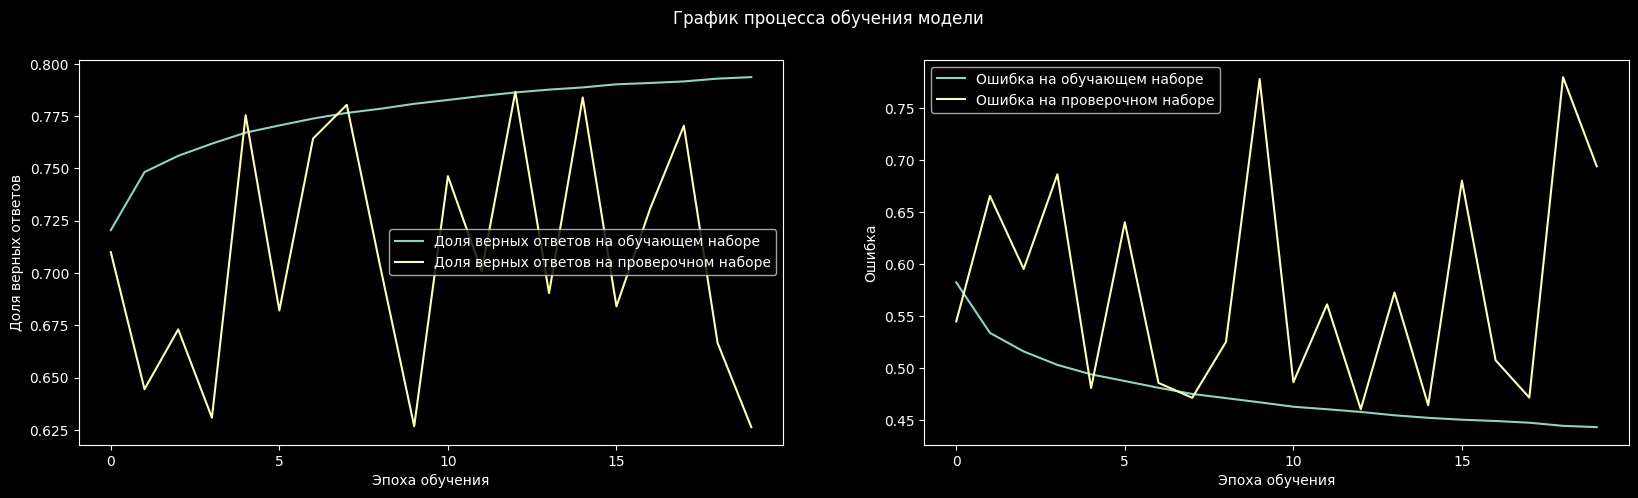

Завершён блок [100_150] - 3-й из 82 
Завершено обучение всех запущенных блоков.
Время обработки: 1075.59 с


In [ ]:
with timex():
  neuro_au()



---



In [ ]:
with timex():
  neuro_au()

- Второй вариант - нарезка 243 ~ на 30 мс
- Модель обучения из варианта 1


Запущен блок [0_50] - 1-й из 82
[0-50]=> Headliner: № 1 -> Длина записи: 627311; Маркер выборки: 0; Число нарезок: 2581
[0-50]=> Headliner: № 2 -> Длина записи: 3149039; Маркер выборки: 1; Число нарезок: 12959
---> Файл "2023-07-19_14-06-31.860077_from_79916000360_to_74957898990_session_3104061795_talk.mp3"
---> объёмом 85871 меньше 75 секунд. Отброшен
[0-50]=> Headliner: № 4 -> Длина записи: 3586223; Маркер выборки: 1; Число нарезок: 14758
---> Файл "2023-07-19_11-40-46.765315_from_79636236173_to_0188880_session_3097851001_talk.mp3"
---> объёмом 507503 меньше 75 секунд. Отброшен
---> Файл "2023-07-19_16-48-29.356893_from_79166887470_to_74959339929_session_3101309777_talk.mp3"
---> объёмом 423407 меньше 75 секунд. Отброшен
---> Файл "2023-07-18_17-59-06.398093_from_79220049154_to_74957898990_session_3102545410_talk.mp3"
---> объёмом 331247 меньше 75 секунд. Отброшен
[0-50]=> Headliner: № 8 -> Длина записи: 3575279; Маркер выборки: 1; Число нарезок: 14713
---> Файл "2023-07-17_13-54-38

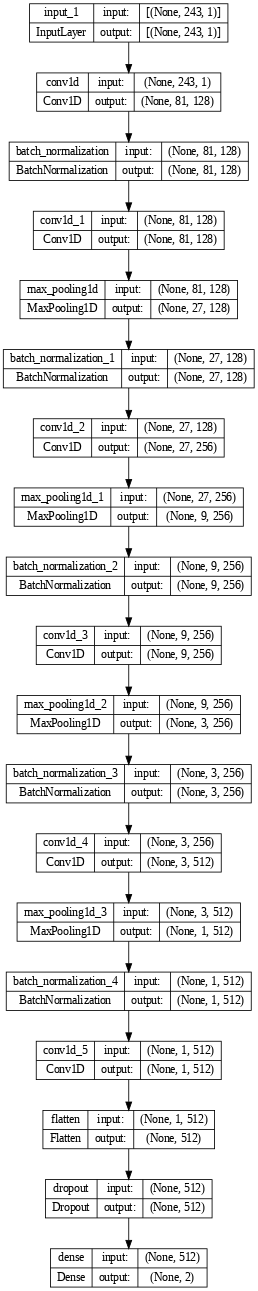

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



XTrain1.shape:  (382515, 243, 1)
YTrain1.shape:  (382515, 2)
XTrain1V.shape:  (45887, 243, 1)
YTrain1V.shape:  (45887, 2)
Обучающая выборка X_Train1 - Целевых: 353248; Нецелевых: 29267
Валидационная выборка X_Train1V - Целевых: 42377; Нецелевых: 3510
Epoch 1/20
748/748 [==============================] - 31s 35ms/step - loss: 0.2486 - accuracy: 0.9265 - val_loss: 0.2136 - val_accuracy: 0.9317
Epoch 2/20
748/748 [==============================] - 25s 33ms/step - loss: 0.2049 - accuracy: 0.9362 - val_loss: 0.7362 - val_accuracy: 0.5228
Epoch 3/20
748/748 [==============================] - 25s 33ms/step - loss: 0.1941 - accuracy: 0.9390 - val_loss: 0.1993 - val_accuracy: 0.9387
Epoch 4/20
748/748 [==============================] - 25s 34ms/step - loss: 0.1857 - accuracy: 0.9415 - val_loss: 0.1967 - val_accuracy: 0.9405
Epoch 5/20
748/748 [==============================] - 25s 34ms/step - loss: 0.1791 - accuracy: 0.9429 - val_loss: 0.2725 - val_accuracy: 0.9210
Epoch 6/20
748/748 [========

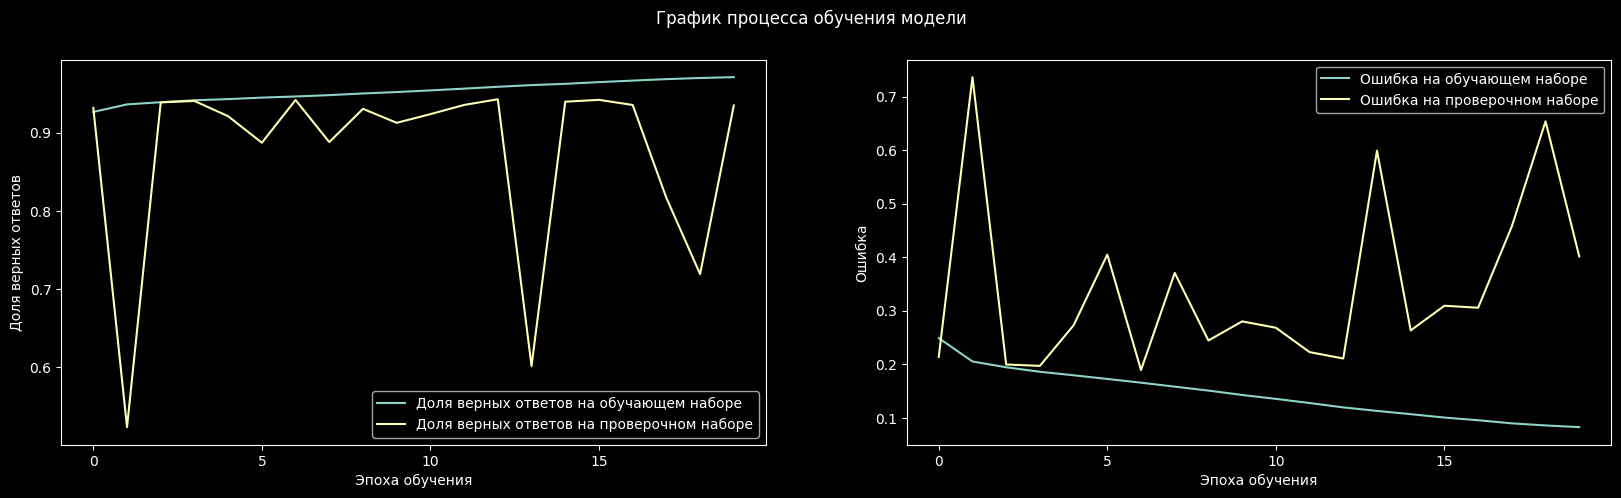

Завершён блок [0_50] - 1-й из 82 

Запущен блок [50_100] - 2-й из 82
---> Файл "2023-07-05_13-27-32.427036_from_74994954349_to_0188880_session_3067922459_talk.mp3"
---> объёмом 444719 меньше 75 секунд. Отброшен
[50-100]=> Headliner: № 52 -> Длина записи: 972335; Маркер выборки: 1; Число нарезок: 4001
---> Файл "2023-07-03_17-51-05.490481_from_79626278319_to_0188880_session_3063974044_talk.mp3"
---> объёмом 446447 меньше 75 секунд. Отброшен
[50-100]=> Headliner: № 54 -> Длина записи: 2657711; Маркер выборки: 1; Число нарезок: 10937
---> Файл "2023-07-03_15-56-51.443508_from_74952151644_to_0188880_session_3063880486_talk.mp3"
---> объёмом 499439 меньше 75 секунд. Отброшен
[50-100]=> Headliner: № 56 -> Длина записи: 2480303; Маркер выборки: 1; Число нарезок: 10207
---> Файл "2023-07-03_15-08-19.559497_from_74952876100_to_74959339902_session_3063842243_talk.mp3"
---> объёмом 447023 меньше 75 секунд. Отброшен
[50-100]=> Headliner: № 58 -> Длина записи: 631343; Маркер выборки: 1; Число нарез

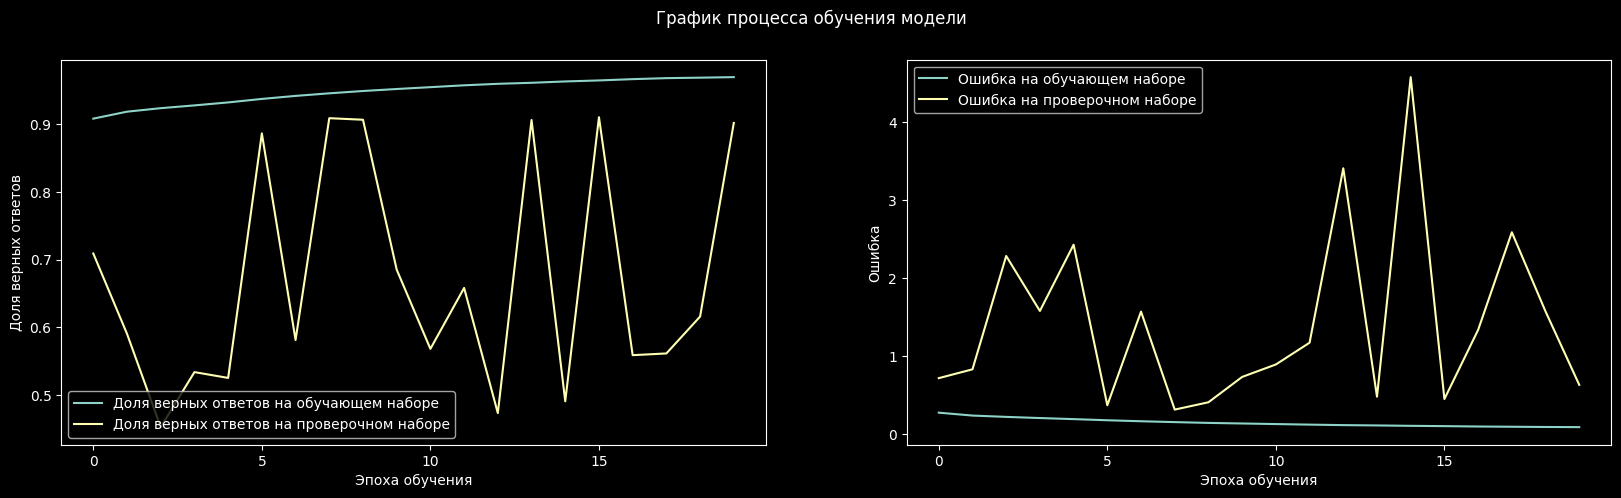

Завершён блок [50_100] - 2-й из 82 

Запущен блок [100_150] - 3-й из 82
---> Файл "2023-06-14_17-49-21.609105_from_79268389155_to_74957898990_session_3023544476_talk.mp3"
---> объёмом 131375 меньше 75 секунд. Отброшен
[100-150]=> Headliner: № 102 -> Длина записи: 1109999; Маркер выборки: 1; Число нарезок: 4567
---> Файл "2023-06-14_11-06-34.526209_from_79290022218_to_74997552563_session_2985033170_talk.mp3"
---> объёмом 346223 меньше 75 секунд. Отброшен
[100-150]=> Headliner: № 104 -> Длина записи: 2030447; Маркер выборки: 1; Число нарезок: 8355
---> Файл "2023-06-13_20-04-41.372121_from_79169549424_to_0188880_session_2984347254_talk.mp3"
---> объёмом 485039 меньше 75 секунд. Отброшен
[100-150]=> Headliner: № 106 -> Длина записи: 1622639; Маркер выборки: 1; Число нарезок: 6677
---> Файл "2023-06-10_17-09-27.282329_from_79636310102_to_74997552563_session_2979780790_talk.mp3"
---> объёмом 255791 меньше 75 секунд. Отброшен
[100-150]=> Headliner: № 108 -> Длина записи: 5233583; Маркер выбо

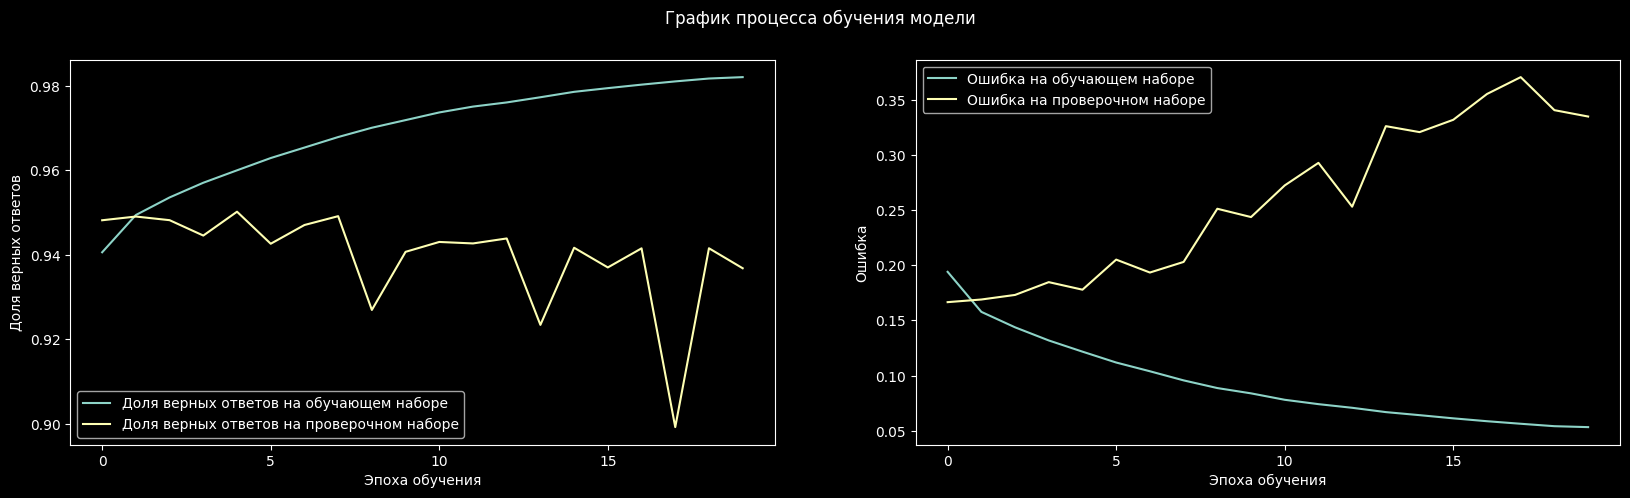

Завершён блок [100_150] - 3-й из 82 
Завершено обучение всех запущенных блоков.
Время обработки: 1822.36 с


In [ ]:
with timex():
  neuro_au()

In [ ]:
with timex():
  neuro_au()


Запущен блок [3600_3650] - 71-й из 82
---> Файл "2023-06-11_10-02-00.631753_from_79163303195_to_0111639_session_2997171199_talk.mp3"
---> объёмом 4079 меньше 75 секунд. Отброшен
[3600-3650]=> Primavera: № 2 -> Длина записи: 2710127; Маркер выборки: 1; Число нарезок: 11152
---> Файл "2023-06-10_19-42-57.413892_from_79854153057_to_0111652_session_2979932542_talk.mp3"
---> объёмом 2927 меньше 75 секунд. Отброшен
[3600-3650]=> Primavera: № 4 -> Длина записи: 3322991; Маркер выборки: 1; Число нарезок: 13674
---> Файл "2023-06-10_19-01-28.275664_from_79859025762_to_0197878_session_2997549289_talk.mp3"
---> объёмом 429743 меньше 75 секунд. Отброшен
[3600-3650]=> Primavera: № 6 -> Длина записи: 930863; Маркер выборки: 1; Число нарезок: 3830
---> Файл "2023-06-10_16-19-21.839121_from_79778214507_to_0197877_session_2996608691_talk.mp3"
---> объёмом 129647 меньше 75 секунд. Отброшен
---> Файл "2023-06-07_15-39-10.255664_from_79253320707_to_0111631_session_2990345039_talk.mp3"
---> объёмом 331823

KeyboardInterrupt: ignored

# Проверка

In [ ]:
TEST_FILES_COUNT = 20

with open(DUMP+'/df_pre_train.pkl', 'rb') as pickle_in:
  df_pre_train = pkl.load(pickle_in)

TR_BLOCKS_TEST_LOC = [ # max = 4222
    [10, 4222]
]

###################################################

def neuro_test_au(): # Формирование тестового набора
  #
  # Параметры настройки нарезки обучения и слоёв модели
  #
  name_list_ = ['Headliner','Paveletskaya_city', 'Paveletskaya_turbo', 'Primavera']
  audio_path_ = [WAV_HEADL, WAV_PAVEL, WAV_PAVEL, WAV_PRIMA]

  pul_size = PUL_SIZE
  sections = SECTIONS
  conv_pull_blocks = len(sections)
  strider = CONV_STRIDE_1
  audio_slicing_size = strider * (pul_size ** conv_pull_blocks)
  df_pre_train_ = df_pre_train
  a_files_count_ = 0
  XT_Marker_0 = 0
  XT_Marker_1 = 0

  #####
  ##### Основной цикл: создания блока тестовых выборок, запуска тестирования
  #####

#  X_tests = pd.DataFrame(columns=['test_array'])
  X_tests = []

  for tr_block_ in TR_BLOCKS_TEST_LOC: #TR_BLOCKS_TEST:
    print('Вошли в основной цикл подготовки тестовых данных...')
    Y_test1 = []
    predict_count_= 0
    last_marker_ = 1

    for i in range(tr_block_[0], tr_block_[1]):
#      print(f'файл {i}')

      X_test1 = list()

      start_time = time.time()
      a_files_count_ +=1

      training_marker_ = df_pre_train_.loc[i]['Tags']
      au_name_ = df_pre_train_.loc[i]['AudioFile']
      data_number_ = df_pre_train_.loc[i]['DataNumber']

      try:
        y, sr = librosa.load(audio_path_[data_number_]+'/'+au_name_, mono=True, sr=SR) #Загружаем аудиофайл
      except LibsndfileError:
        print(f'Ошибка обработки файла: {audio_path_[data_number_]+"/"+au_name_}')
        continue
      except FileNotFoundError:
        print(f'Не найден файл: {audio_path_[data_number_]+"/"+au_name_}')
        continue

      au_len_ = len(y) # Количество сигналов

      # Не попадёт в выборку - файл меньше 75 секунд (по ТЗ)
      #if au_len_ < DISCARD_AUDIO_75:
      #  print(f'---> Файл "{au_name_}"\n---> объёмом {au_len_} меньше 75 секунд. Отброшен')
      #  continue

      # Не попадёт в выборку - файл меньше длины нарезки + отбрасывания начала
      #if au_len_ < audio_slicing_size + CUT_AUDIO_BEG:
      #  print(f'===> Файл "{au_name_}"\n===> после -75 секунд объёмом {au_len_ - DISCARD_AUDIO_75} меньше слайсинга + отсечения начала {audio_slicing_size}+{CUT_AUDIO_BEG}. Отброшен')
      #  continue

      # Обрезка начала записи
      y = y[CUT_AUDIO_BEG:]

      print(f'[{tr_block_[0]}-{tr_block_[1]}]=> {name_list_[data_number_]}: № {a_files_count_} -> Длина записи: {au_len_}; Маркер выборки: {training_marker_}; Число нарезок: {round(au_len_//audio_slicing_size)}',
            end='\n')

      counter = 0 # Счетчик обработанных аудиоданных
      pos = 0 # Указатель на начало вырезки аудио

      ohe_marker_ = lambda training_marker_: [1, 0] if training_marker_ == 0 else [0, 1]
      Y_test_ = []
      while (pos + audio_slicing_size < len(y)):  # Пробегаем по файлу
        counter+=1
        if counter % 10 != 0: # ~ 80% - 90% уже отрезано в обучение
          if counter % 12 == 0: # Отстегнём в тестовую выборку
            X_test1.append(y[pos: pos + audio_slicing_size]) # Вырезаем часть размером нарезки и добавляем в тестовую выборку
            #Y_test_.append(ohe_marker_(training_marker_)) # Соответствующий маркер в Ytest
            #print(f'audio_slicing_size = {audio_slicing_size}')
            #print(f'1) len(X_test1) = {len(X_test1)}')
            #print(f'1) len(Y_test1) = {len(Y_test1)}')
            #print(f'1) au_len_ = {au_len_}')
        pos += audio_slicing_size // CUTTING_PART_TRAIN # CUTTING_PART_TRAIN CUTTING_PART_PREDICT# Шаг сдвига нарезки
      #print(f'2) len(X_test1) = {len(X_test1)}')
      #print(f'2) len(Y_test1) = {len(Y_test1)}')

      # Пропускаем, если случайно выборка пуста
      if len(X_test1) == 0:
        #print(f'3) au_len_ = {au_len_}')
        #Y_test1.pop()
        continue

      X_test1 = np.array(X_test1)

      # !!! Регулятор объёма тестовых выборок !!!
      # !!! В тестовую выборку набираем только с количеством нарезок не меньше заданного
      if X_test1.shape[0] < 3:
        continue

      # Чередуем в тестовую выборку по маркерам
      if last_marker_ != training_marker_:
        print(f'Файл {i}; last_marker_ = {last_marker_}; training_marker_ = {training_marker_}')
        last_marker_ = training_marker_
      else:
        continue

      if training_marker_ == 0: # Счётчик маркеров в тестовой выборке
        XT_Marker_0 += 1
      else:
        XT_Marker_1 += 1

      X_test1 = np.expand_dims(X_test1, axis=2)
      print(f'Файл {i}: X_test1.shape = {X_test1.shape}, Маркер:{training_marker_}')

      X_tests.append(X_test1)
      Y_test1.append(ohe_marker_(training_marker_))

##      print(f'---> X_tests[{len(X_tests)-1}] = {X_tests[len(X_tests)-1]}')
##      print(f'---> Y_test1[{len(Y_test1)-1}] = {Y_test1[len(Y_test1)-1]}')

      # !!!  Задаём предельный объём тестовой выборки
      print(f'predict_count_ = {predict_count_}')
      if predict_count_== TEST_FILES_COUNT:
        break
      else:
        predict_count_ += 1

    Y_test1 = np.array(Y_test1)

    print('Сохраняем...\n')
    with open(DUMP+'/X_tests.pkl', 'wb') as pickle_out:
      pkl.dump(X_tests, pickle_out)
    with open(DUMP+'/Y_test1.pkl', 'wb') as pickle_out:
      pkl.dump(Y_test1, pickle_out)

#    print('Тестируем...\n')
#    print(f'В тестовой выборке - Целевых: {XT_Marker_1}; Нецелевых: {XT_Marker_0}')

#    if 'model_au' not in locals():
#      model_au = load_model(DUMP + '/model_au.h5')

#    checkModel(model_au, X_tests, Y_test)

#  print('Тестирование завершено.')
  print('Подготовка тестовых данных завершена.')


In [ ]:
#Проверяем работу модели
# def checkModel(model, X_tests, Y_test):
def checkModel():
  print('Запуск тестирования...')
  validations = 0
  validation_errors = 0

  print('Чтение тестовых данных и модели с диска...')
  with open(DUMP+'/X_tests.pkl', 'rb') as pickle_in:
    X_tests = pkl.load(pickle_in)
  with open(DUMP+'/Y_test1.pkl', 'rb') as pickle_in:
    Y_test1 = pkl.load(pickle_in)

#  with custom_object_scope({'LeakyReLUWithCustomAlpha': LeakyReLUWithCustomAlpha}):
  model = load_model(DUMP + '/model_au.h5')

  #print(f"len(X_tests) = {len(X_tests)}")
  #print(f"len(Y_test1) = {len(Y_test1)}")

  # По всем тестовым аудиофайлам
  for i in range(len(X_tests)):
    validations += 1

    predictions = np.sum(model.predict(X_tests[i]), axis = 0)
    predict_i = np.argmax(predictions)

    # Y_test1[i][0] == 1 => == 0
    # Y_test1[i][1] == 1 => == 1
    if (Y_test1[i][0]==1 and predict_i==0) or (Y_test1[i][1]==1 and predict_i==1):
      if Y_test1[i][0]==1:
        true_ = 'Нецелевой'
      elif Y_test1[i][1]==1:
        true_ = 'Целевой'
      else:
        print('Ошибка в данных: невозможный ohe.')
      print(f'Ответ верный: звонок "{true_}"')
    else:
      if predict_i==0:
        true_ = 'Целевой'
        false_ = 'Нецелевой'
      elif predict_i==1:
        true_ = 'Нецелевой'
        false_ = 'Целевой'
      else:
        print('Ошибка в данных: невозможный ответ predict_i.')
      print(f'Распознано с ошибкой. Вместо "{true_}" распознано "{false_}"')
      validation_errors += 1
  # Итог
  trueValidations = validations - validation_errors
  print("Итого распознаваний проведено: ", validations)
  print("Итого распознаваний ВЕРНЫХ: ", trueValidations, "(", 100*trueValidations/validations,"%)")


In [ ]:
with open(DUMP+'/X_tests.pkl', 'rb') as pickle_in:
  X_tests_ = pkl.load(pickle_in)
with open(DUMP+'/Y_test1.pkl', 'rb') as pickle_in:
  Y_test1_ = pkl.load(pickle_in)
model_ = load_model(DUMP + '/model_au.h5')

In [ ]:
len(Y_test1_)

16957

In [ ]:
model_.predict(X_tests_[0])

24/24 [==============================] - 1s 11ms/step


array([[0.07694851, 0.9230515 ],
       [0.04668898, 0.953311  ],
       [0.07075065, 0.92924935],
       ...,
       [0.04018726, 0.95981276],
       [0.02230173, 0.97769827],
       [0.00163441, 0.9983656 ]], dtype=float32)

In [ ]:
t_00_ = 0
t_01_ = 0
t_10_ = 0
t_11_ = 0
for i in range(len(Y_test1_)):
  if Y_test1_[i][0]==0 and Y_test1_[i][1]==0:
    t_00_ += 1
  if Y_test1_[i][0]==0 and Y_test1_[i][1]==1:
    t_01_ += 1
  if Y_test1_[i][0]==1 and Y_test1_[i][1]==0:
    t_10_ += 1
  if Y_test1_[i][0]==1 and Y_test1_[i][1]==1:
    t_11_ += 1

print('len(Y_test1_) = ', len(Y_test1_))
print(f't_00_ = {t_00_}; t_01_ = {t_01_}; t_10_ = {t_10_}; t_11_ = {t_11_}')
print(f'sum(t_00_+t_01_+t_10_+t_11_) = {t_00_+t_01_+t_10_+t_11_}')

len(Y_test1_) =  16957
t_00_ = 0; t_01_ = 10869; t_10_ = 6088; t_11_ = 0
sum(t_00_+t_01_+t_10_+t_11_) = 16957


In [ ]:
with timex():
  neuro_test_au()

Вошли в основной цикл подготовки тестовых данных...
---> Файл "2023-07-17_11-39-53.111572_from_79150556347_to_0188880_session_3094901292_talk.mp3"
---> объёмом 297839 меньше 75 секунд. Отброшен
[10-4222]=> Headliner: № 2 -> Длина записи: 2518319; Маркер выборки: 1; Число нарезок: 10363
[10-4222]=> Headliner: № 3 -> Длина записи: 1434863; Маркер выборки: 0; Число нарезок: 5904
Файл 12; last_marker_ = 1; training_marker_ = 0
Файл 12: X_test1.shape = (747, 243, 1), Маркер:0
predict_count_ = 0
[10-4222]=> Headliner: № 4 -> Длина записи: 2601263; Маркер выборки: 1; Число нарезок: 10704
Файл 13; last_marker_ = 0; training_marker_ = 1
Файл 13: X_test1.shape = (1389, 243, 1), Маркер:1
predict_count_ = 1
---> Файл "2023-07-15_13-29-42.277835_from_79031608861_to_0188880_session_3092023167_talk.mp3"
---> объёмом 206831 меньше 75 секунд. Отброшен
---> Файл "2023-07-19_15-40-22.410545_from_79150222108_to_74957898990_session_3104358905_talk.mp3"
---> объёмом 587567 меньше 75 секунд. Отброшен
---> Фа

In [ ]:
with timex():
  checkModel()

Запуск тестирования...
Чтение тестовых данных и модели с диска...
24/24 [==============================] - 0s 6ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
44/44 [==============================] - 0s 6ms/step
Ответ верный: звонок "Целевой"
11/11 [==============================] - 0s 6ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
31/31 [==============================] - 0s 5ms/step
Ответ верный: звонок "Целевой"
12/12 [==============================] - 0s 6ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
36/36 [==============================] - 0s 5ms/step
Ответ верный: звонок "Целевой"
14/14 [==============================] - 0s 6ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
19/19 [==============================] - 0s 5ms/step
Ответ верный: звонок "Целевой"
15/15 [==============================] - 0s 7ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
40/40 [================



---



- Тесты варианта 2 с нарезкой 243

In [ ]:
with timex():
  neuro_test_au()

Вошли в основной цикл подготовки тестовых данных...
Файл 3000; last_marker_ = 1; training_marker_ = 0
Файл 3000: X_test1.shape = (5, 137781, 1), Маркер:0
predict_count_ = 0
Файл 3003; last_marker_ = 0; training_marker_ = 1
Файл 3003: X_test1.shape = (16, 137781, 1), Маркер:1
predict_count_ = 1
Файл 3026; last_marker_ = 1; training_marker_ = 0
Файл 3026: X_test1.shape = (4, 137781, 1), Маркер:0
predict_count_ = 2
Файл 3027; last_marker_ = 0; training_marker_ = 1
Файл 3027: X_test1.shape = (8, 137781, 1), Маркер:1
predict_count_ = 3
Файл 3082; last_marker_ = 1; training_marker_ = 0
Файл 3082: X_test1.shape = (3, 137781, 1), Маркер:0
predict_count_ = 4
Файл 3085; last_marker_ = 0; training_marker_ = 1
Файл 3085: X_test1.shape = (8, 137781, 1), Маркер:1
predict_count_ = 5
Файл 3092; last_marker_ = 1; training_marker_ = 0
Файл 3092: X_test1.shape = (5, 137781, 1), Маркер:0
predict_count_ = 6
Файл 3093; last_marker_ = 0; training_marker_ = 1
Файл 3093: X_test1.shape = (4, 137781, 1), Маркер:

In [ ]:
with timex():
  checkModel()

Запуск тестирования...
Чтение тестовых данных и модели с диска...
1/1 [==============================] - 1s 1s/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 1s 1s/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 0s 314ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 1s 602ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 0s 228ms/step
Распознано с ошибкой. Вместо "Нецелевой" распознано "Целевой"
1/1 [==============================] - 1s 569ms/step
Ответ верный: звонок "Целевой"
1/1 [==============================] - 0s 414ms/step
Ответ верный: звонок "Целевой"
1/1 [==============================] - 0s 336ms/step
Ответ верный: звонок "Целевой"
1/1 [==============================] - 0s 317ms/step
Ответ верный: звонок "Целевой"
1/1 [========================



---

